In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 
from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from pandas_profiling import ProfileReport
import itertools
import scipy
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer
from kmodes.kmodes import KModes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import warnings
warnings.filterwarnings('ignore')

C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Read in Data

In [2]:
df = pd.read_csv("C:/Users/krist/Desktop/Queens/MMA 869/jewelry_customers.csv")
df.head()

Age  Income  SpendingScore       Savings
0   58   77769       0.791329   6559.829923
1   59   81799       0.791082   5417.661426
2   62   74751       0.702657   9258.992965
3   59   74373       0.765680   7346.334504
4   87   17760       0.348778  16869.507130

In [3]:
df.isna().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [6]:
#EDA of variables
prof = ProfileReport(df, minimal=False) 
prof.to_notebook_iframe()

# K-Means

In [7]:
from sklearn.cluster import KMeans

k_means=KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=42)
k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [8]:
k_means.labels_

array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 4, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

In [9]:
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [10]:
scaler.inverse_transform(k_means.cluster_centers_)

array([[8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780992e-02, 1.48086838e+04]])

In [11]:
#good silhouette score
silhouette_score(X, k_means.labels_)

0.8048976287605383

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C5E967F40>,
                     model=None)

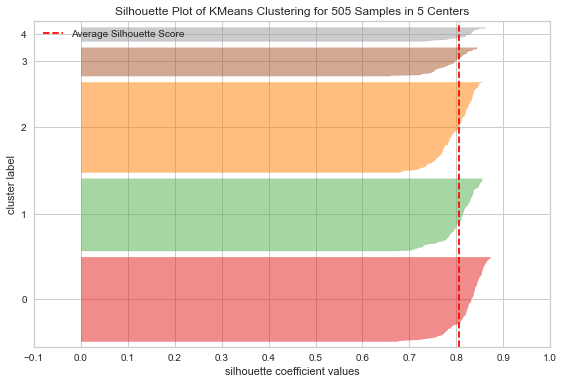

In [12]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()

# Looking for optimal k
k=5 seems to be the optimal number of clusters for this data set. Silhouette plot clearly shows 

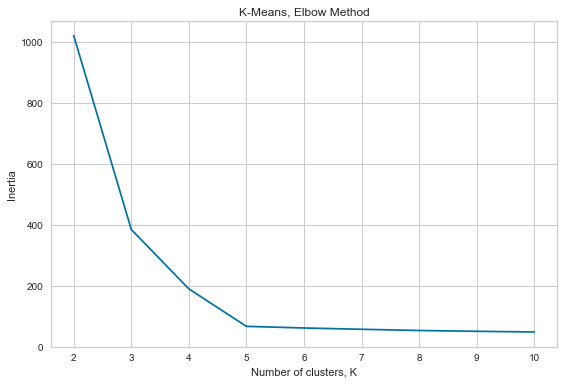

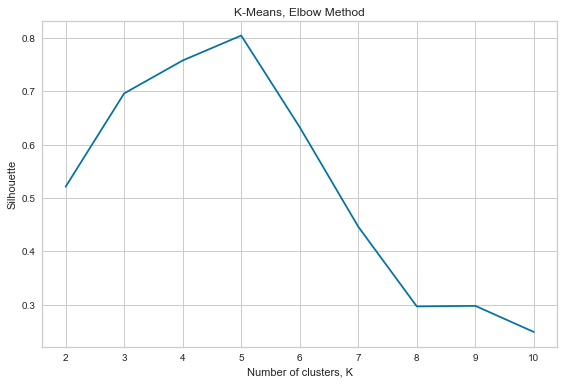

In [13]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

# Finding Examplars to help interpret the clusters

In [14]:
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = X[k_means.labels_==label].copy()
    X_tmp=pd.DataFrame(scaler.inverse_transform(X_tmp),columns = X_tmp.columns)
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])

   
    print('\nCluster {}:'.format(label))
    exemplar


Cluster 0:


87
Age               87.000000
Income         12000.000000
SpendingScore      0.342991
Savings        16180.265250


Cluster 1:


82
Age               34.000000
Income         89598.000000
SpendingScore      0.340152
Savings        12832.768720


Cluster 2:


99
Age               59.000000
Income         56321.000000
SpendingScore      0.806566
Savings         6129.288986


Cluster 3:


36
Age                28.000000
Income         117108.000000
SpendingScore       0.857078
Savings          4749.879237


Cluster 4:


20
Age                84.000000
Income         110582.000000
SpendingScore       0.079049
Savings         14937.995170

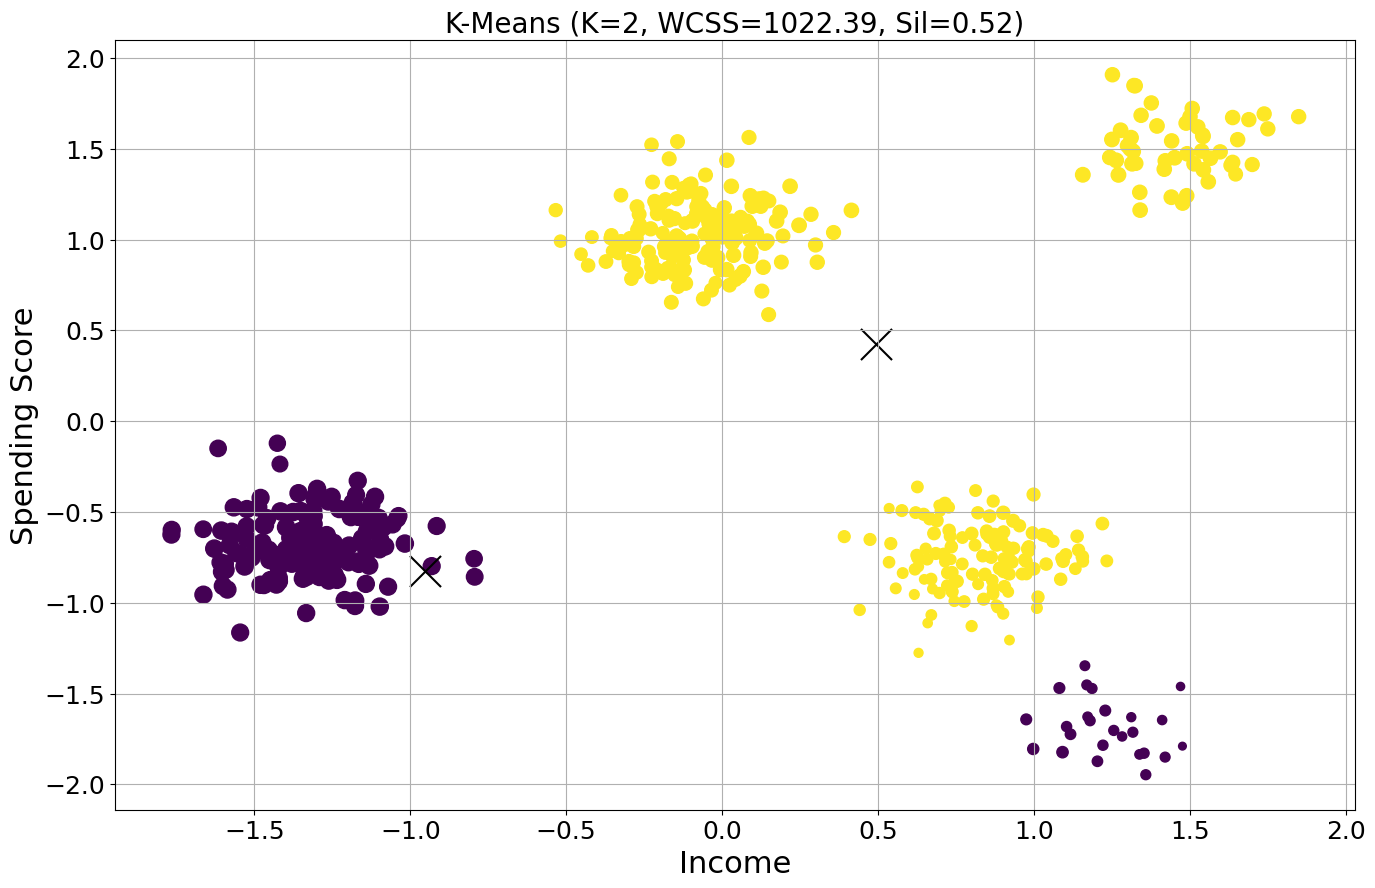

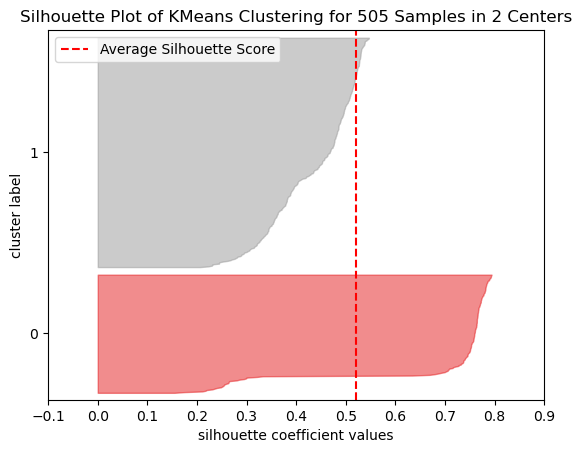

K=2, WCSS=1022.39, Sil=0.52


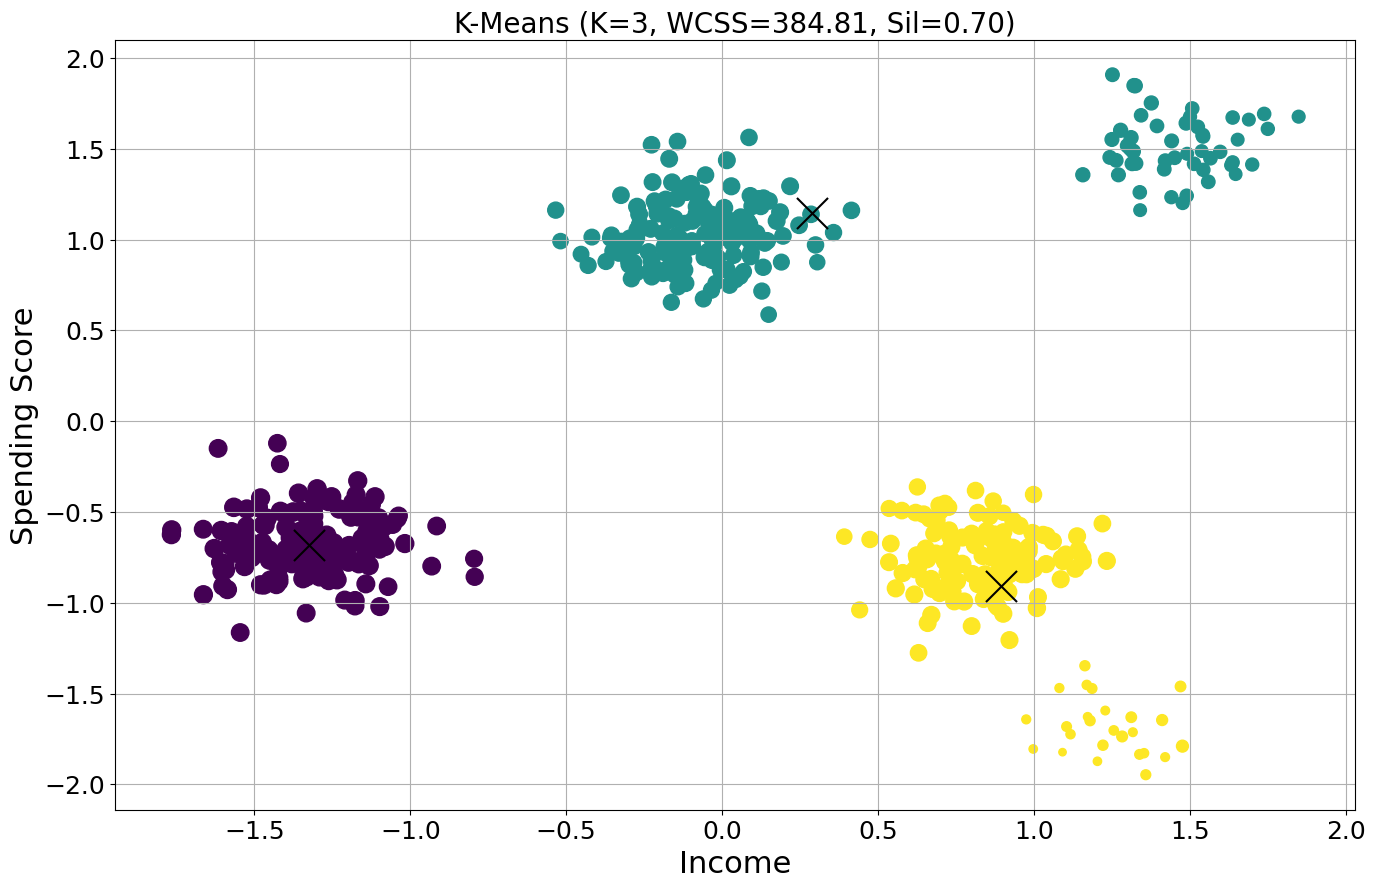

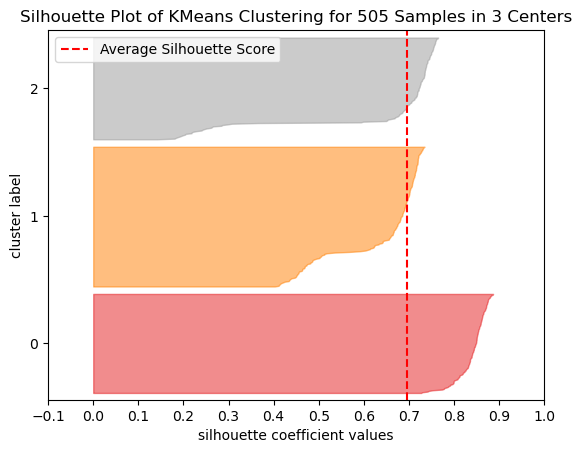

K=3, WCSS=384.81, Sil=0.70


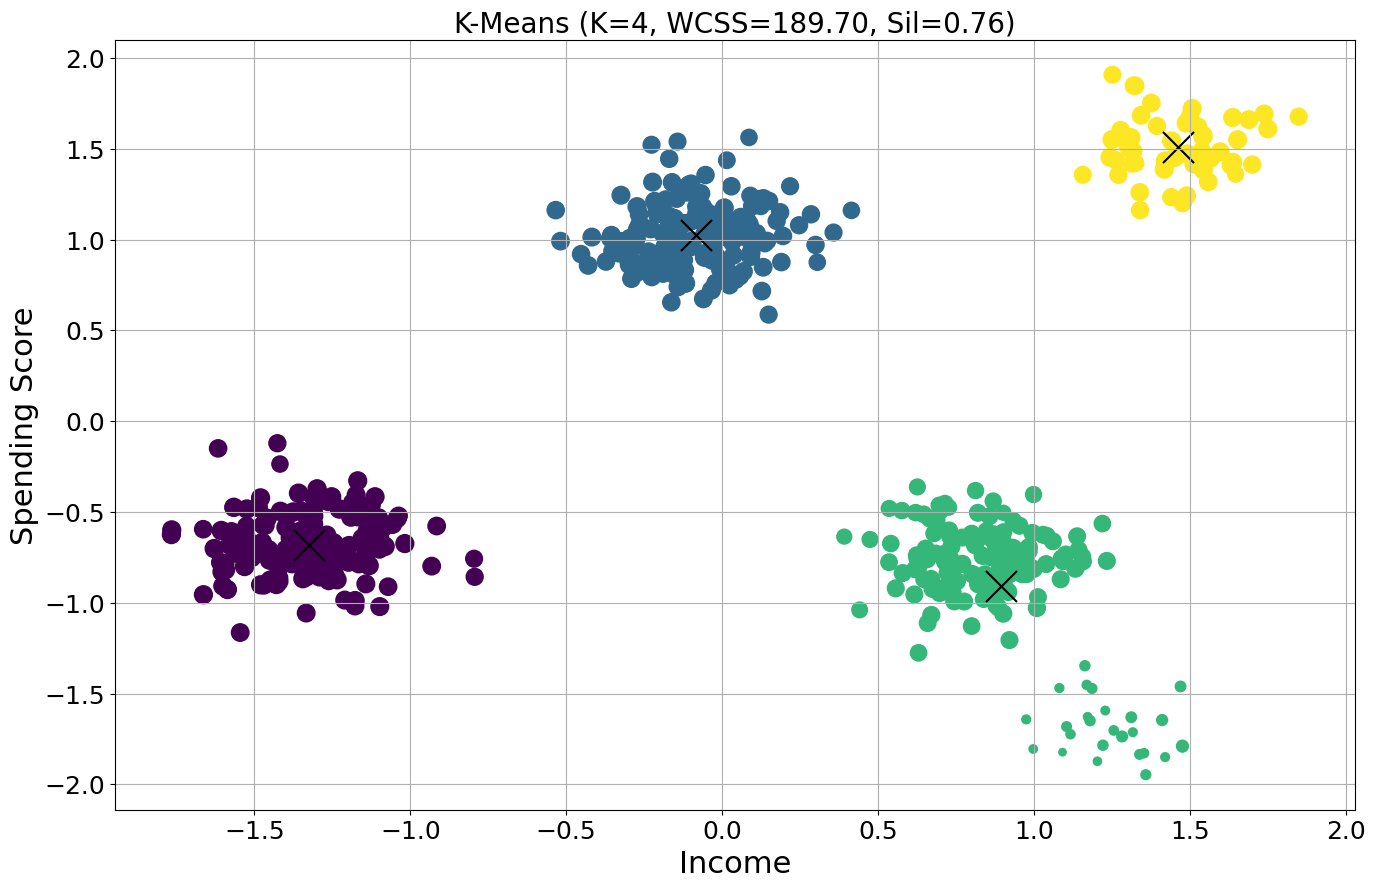

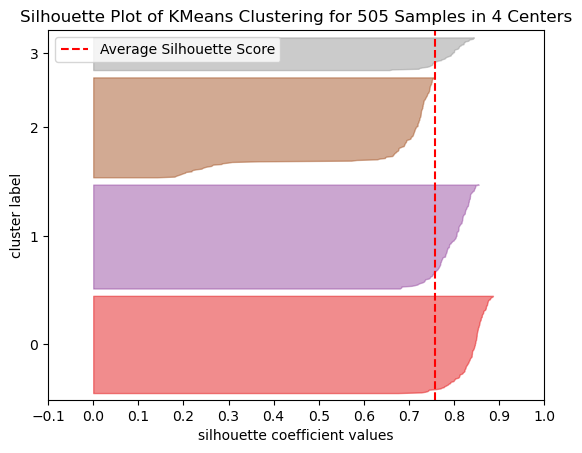

K=4, WCSS=189.70, Sil=0.76


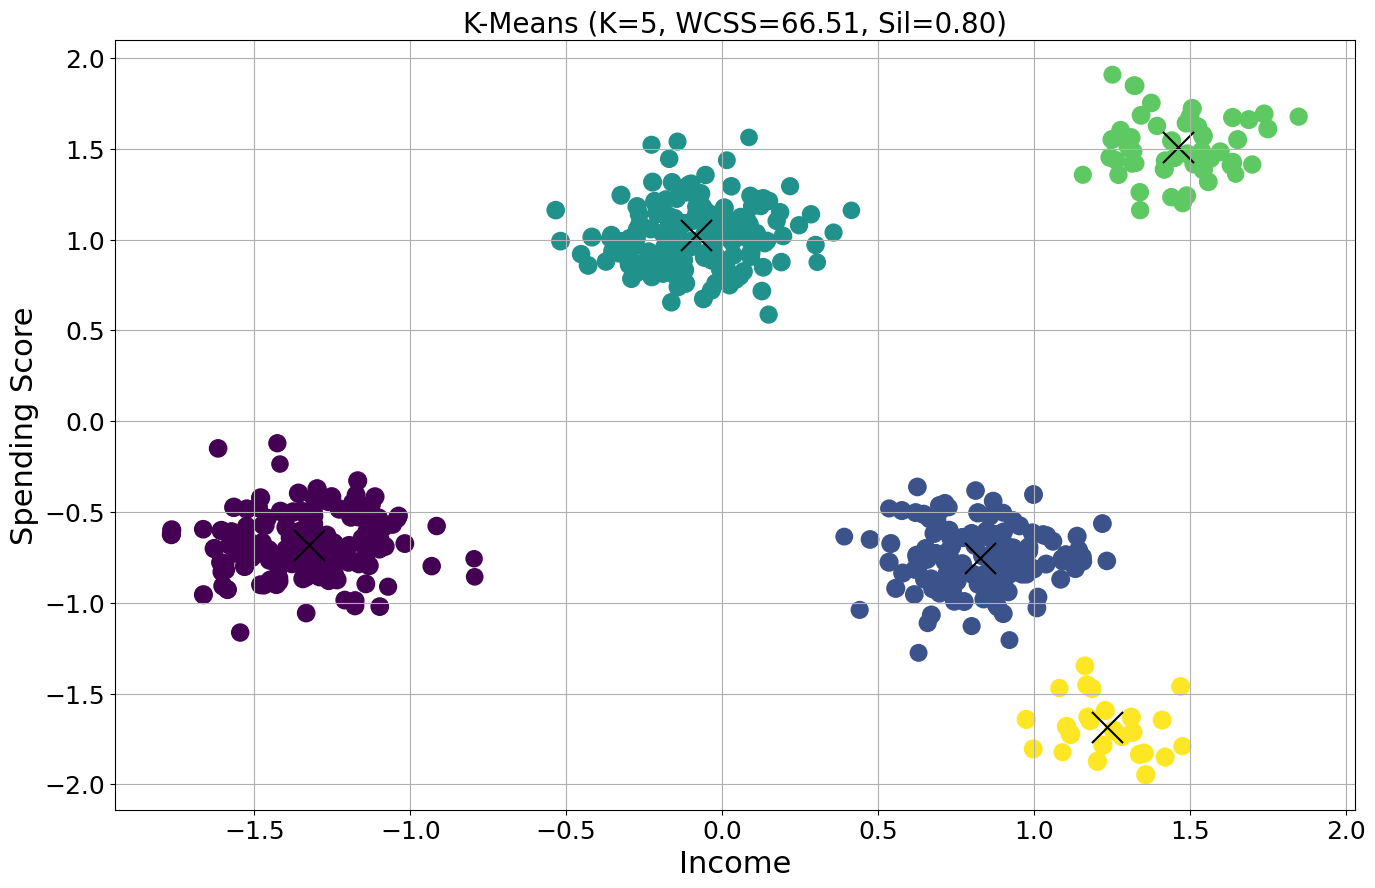

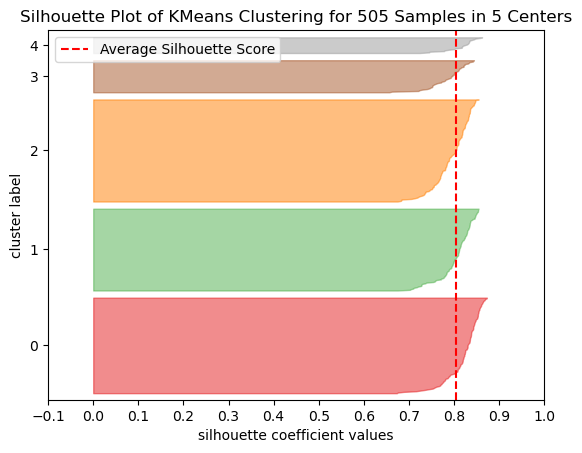

K=5, WCSS=66.51, Sil=0.80


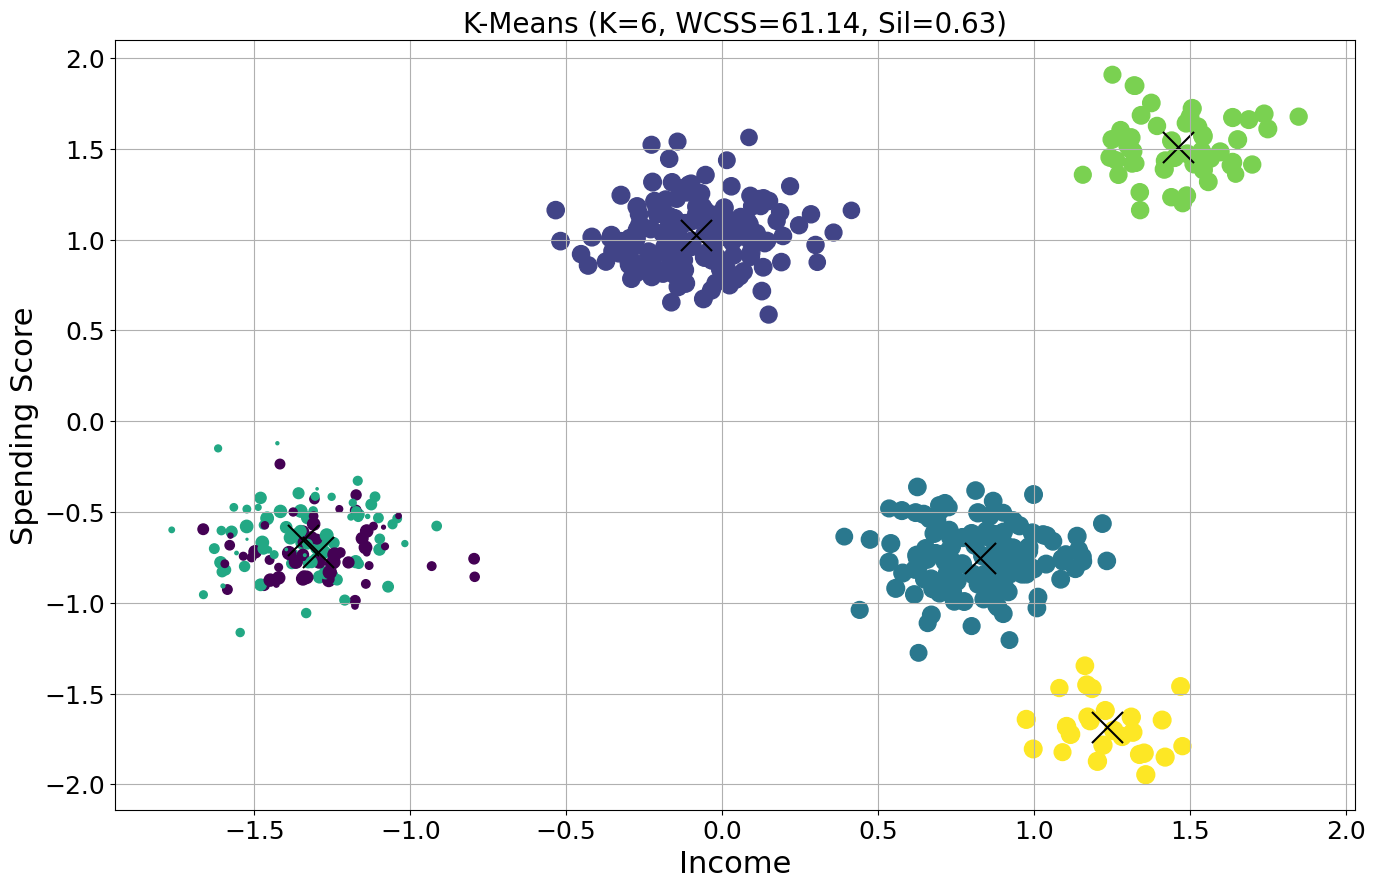

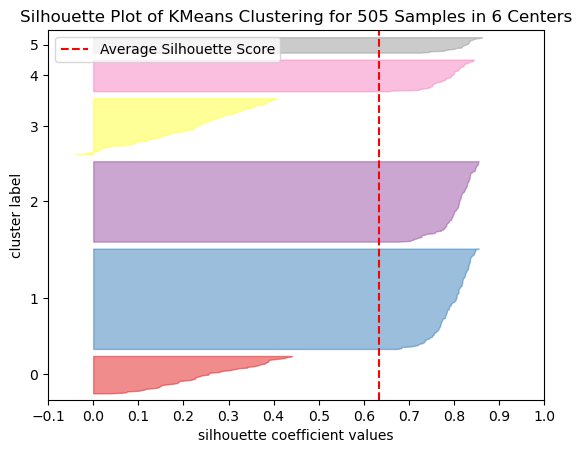

K=6, WCSS=61.14, Sil=0.63


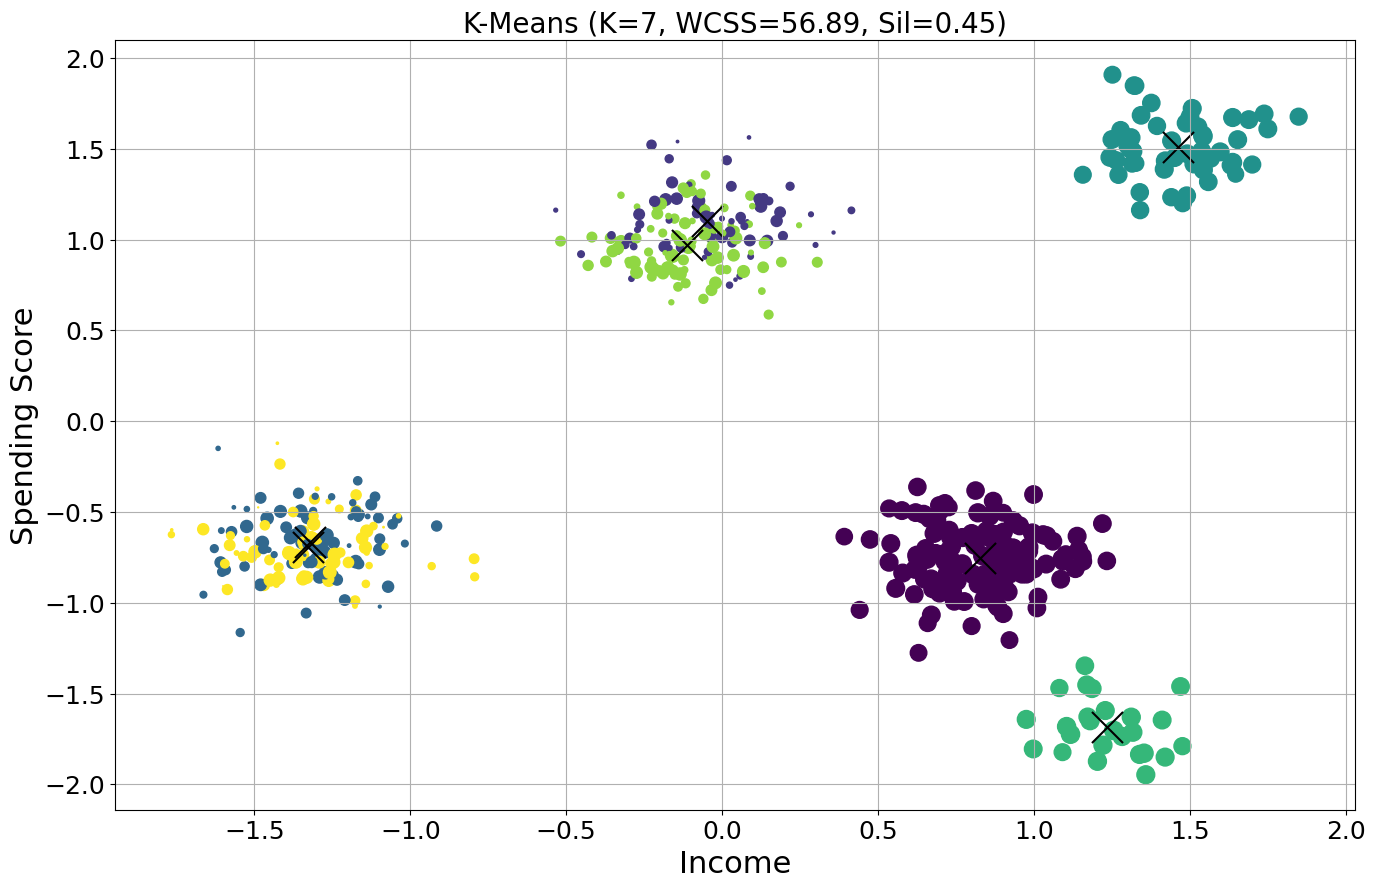

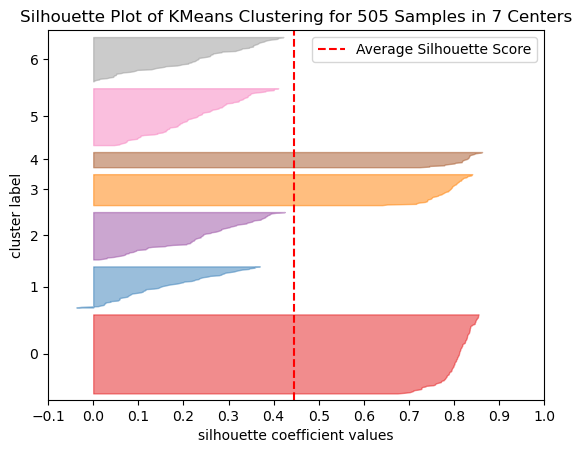

K=7, WCSS=56.89, Sil=0.45


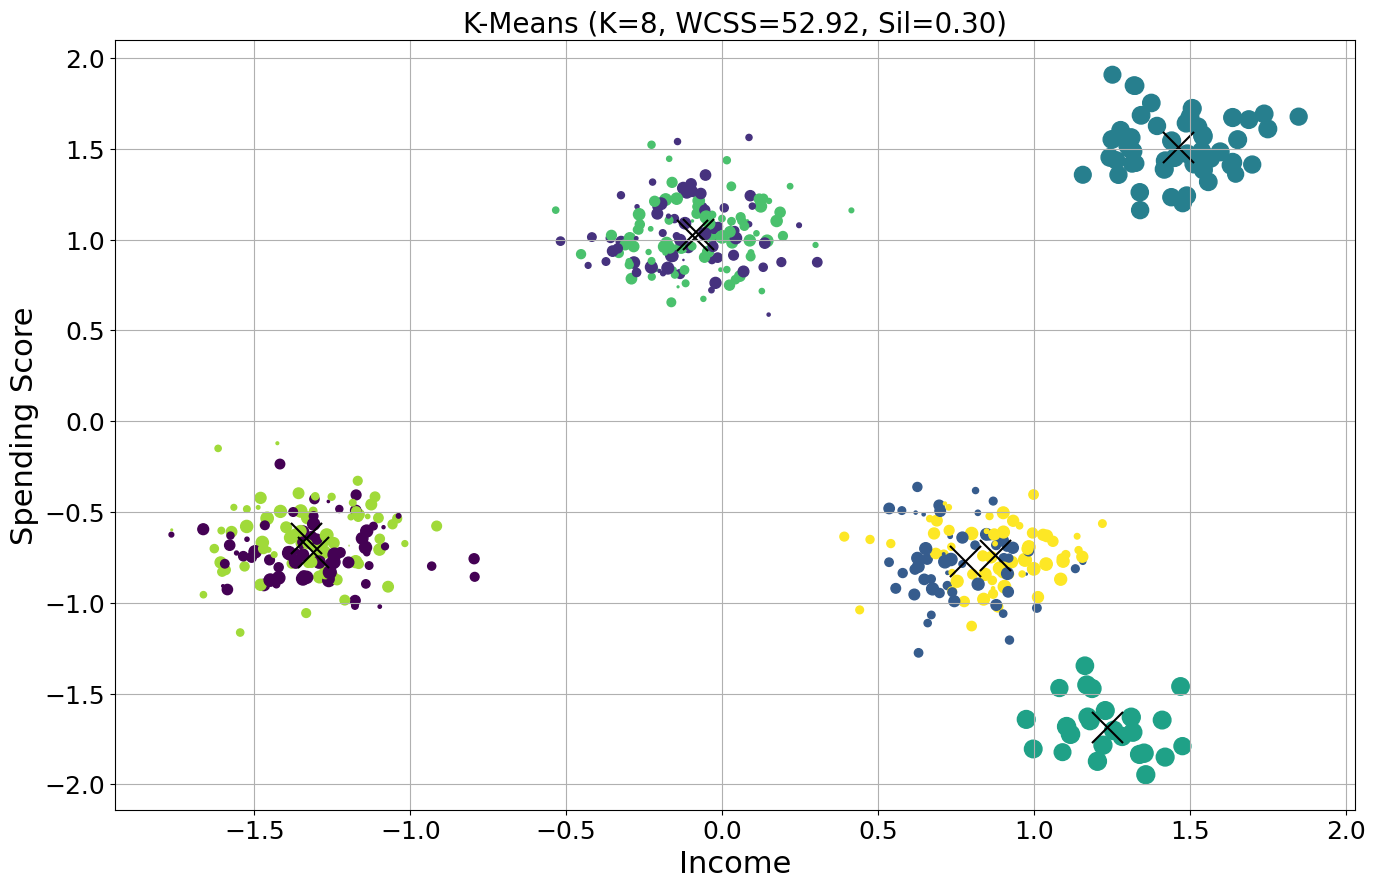

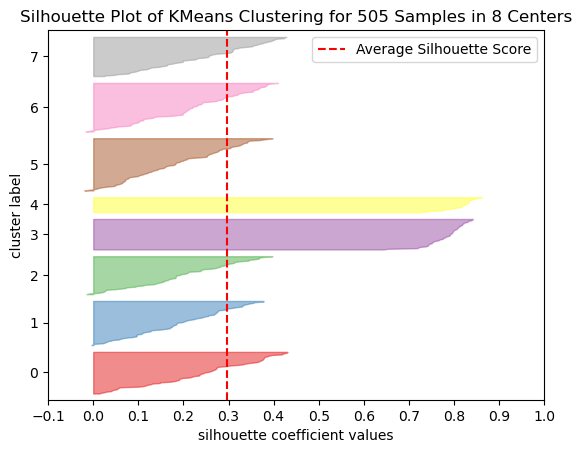

K=8, WCSS=52.92, Sil=0.30


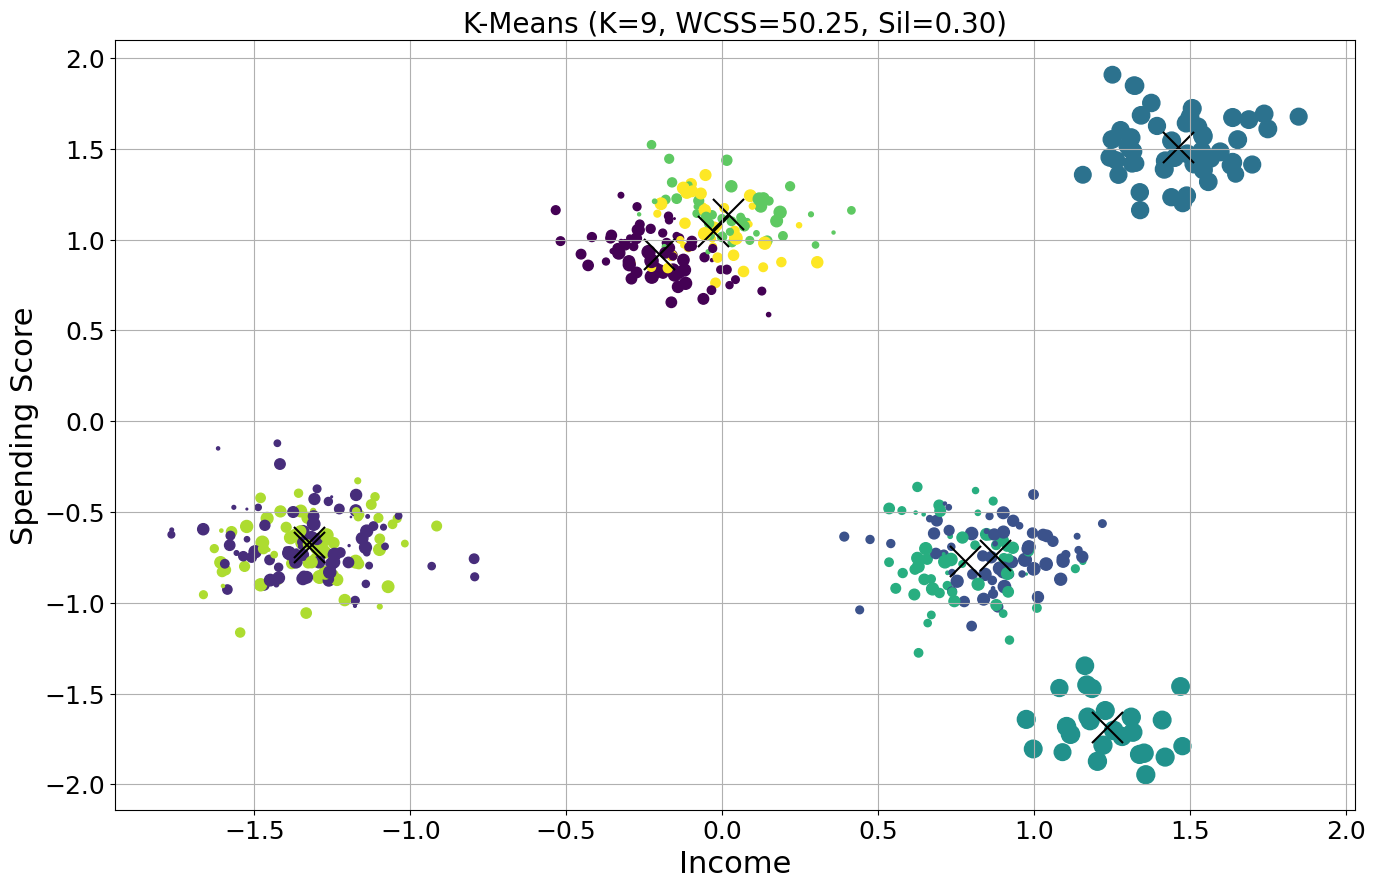

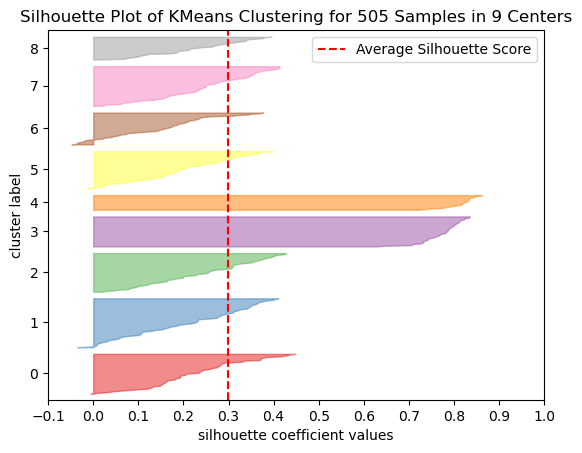

K=9, WCSS=50.25, Sil=0.30


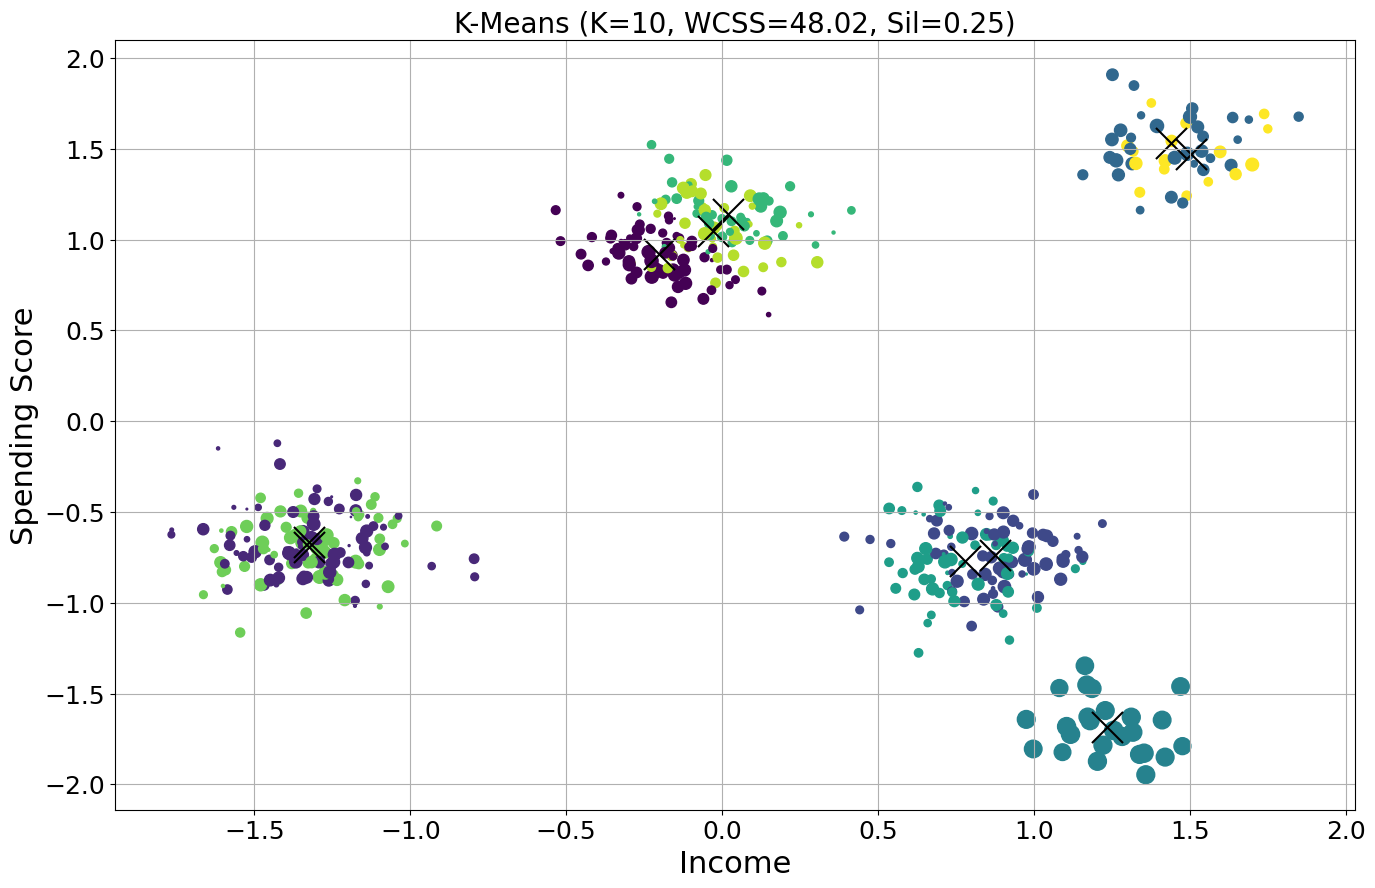

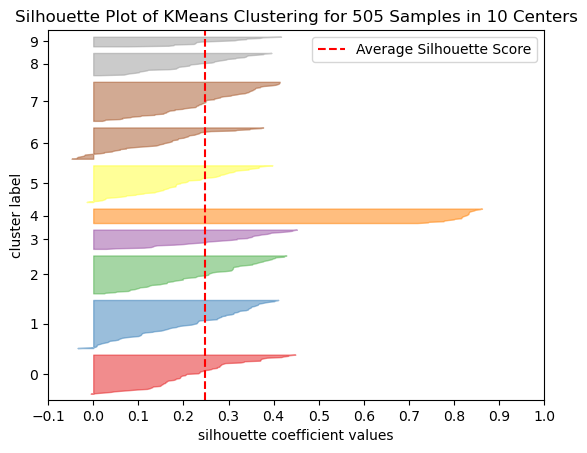

K=10, WCSS=48.02, Sil=0.25


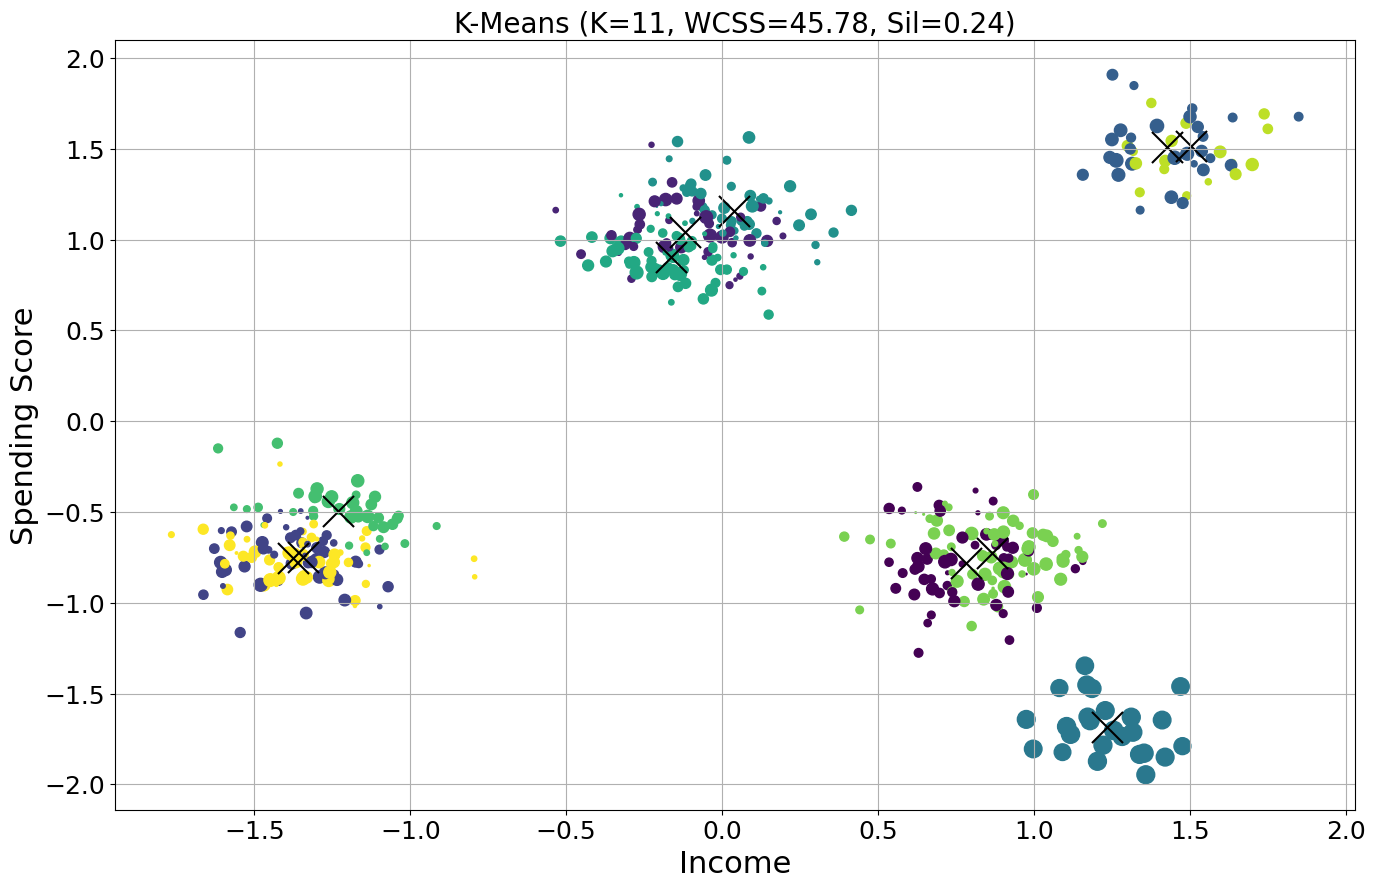

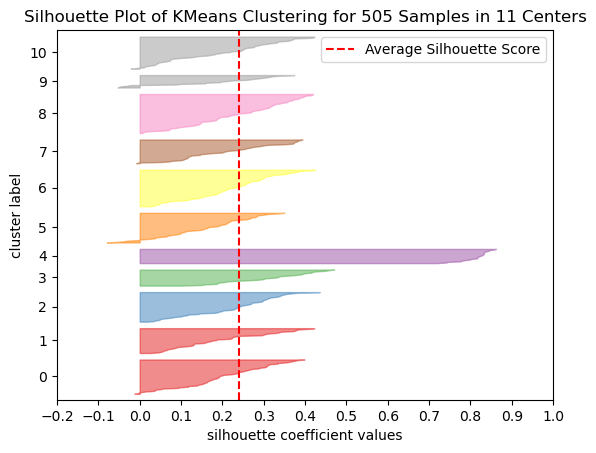

K=11, WCSS=45.78, Sil=0.24


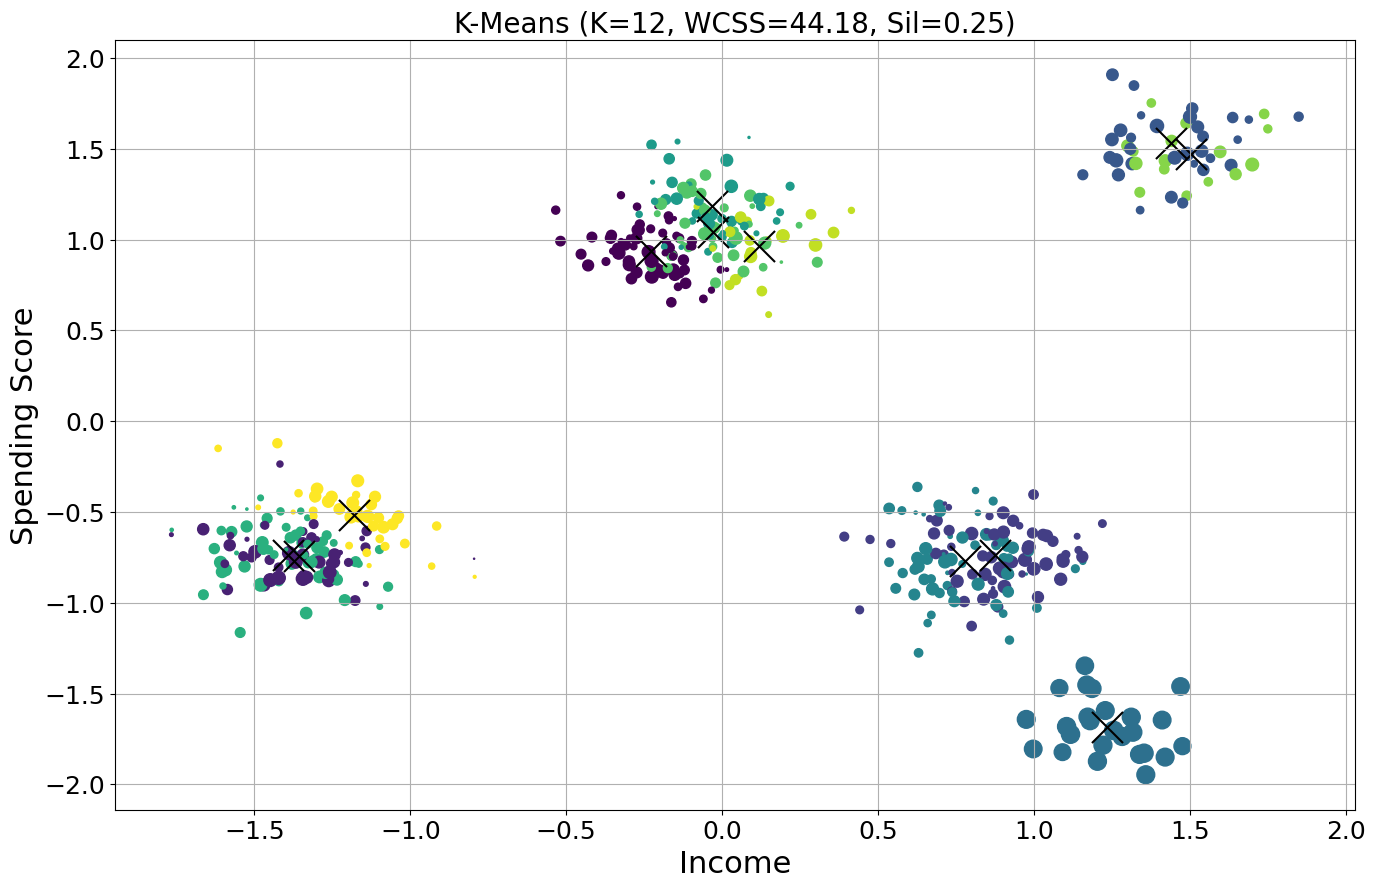

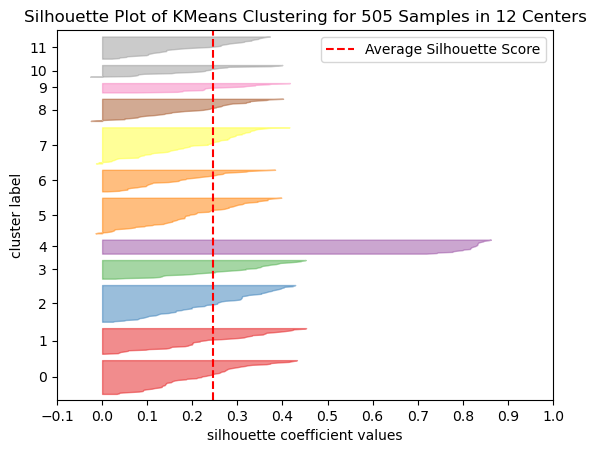

K=12, WCSS=44.18, Sil=0.25


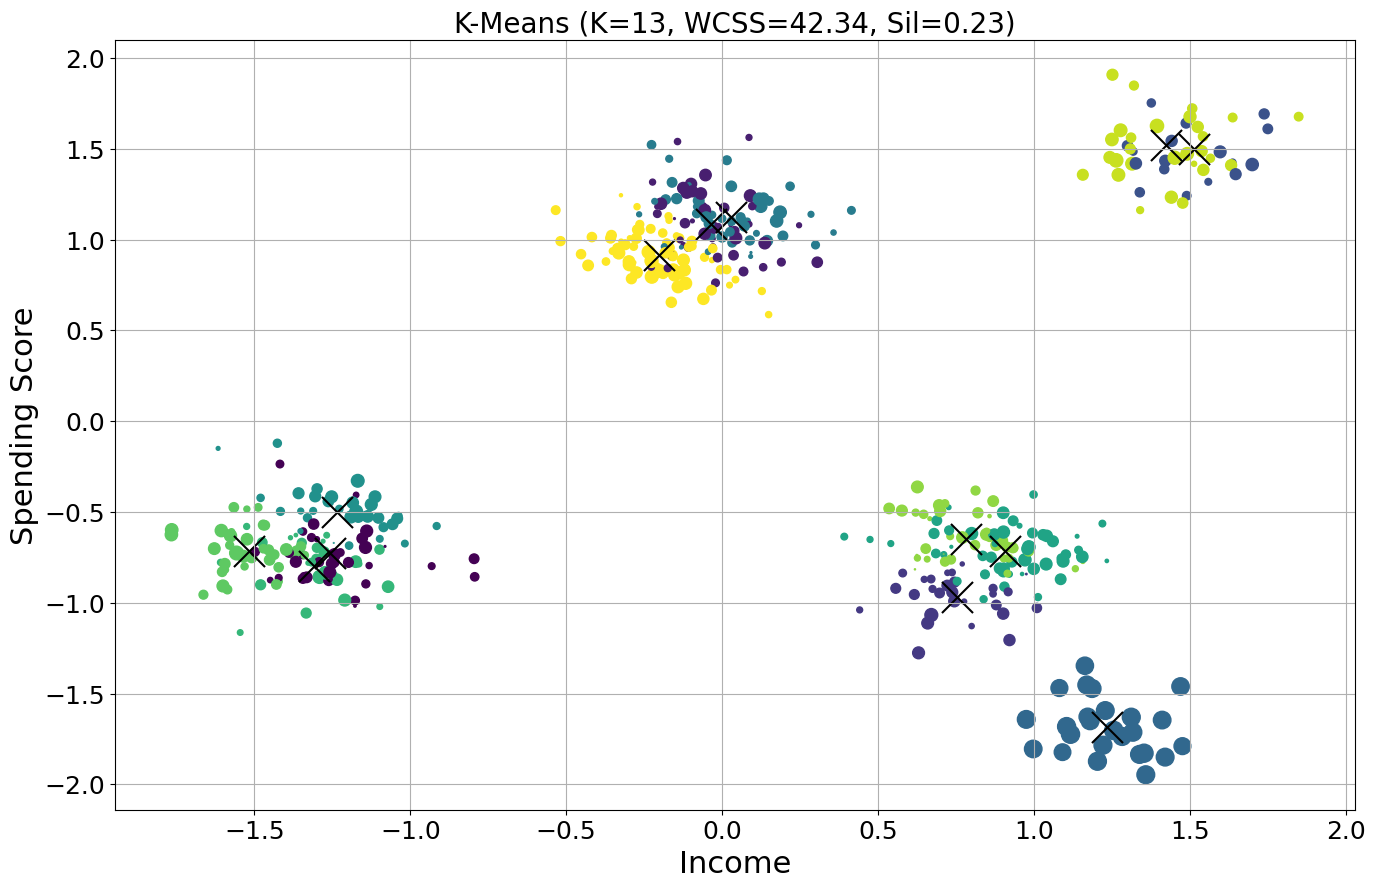

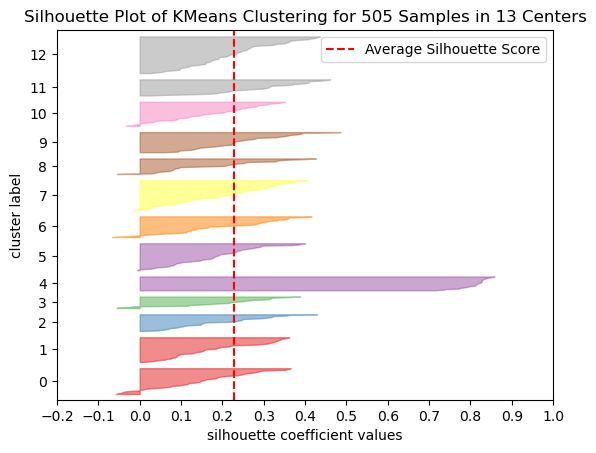

K=13, WCSS=42.34, Sil=0.23


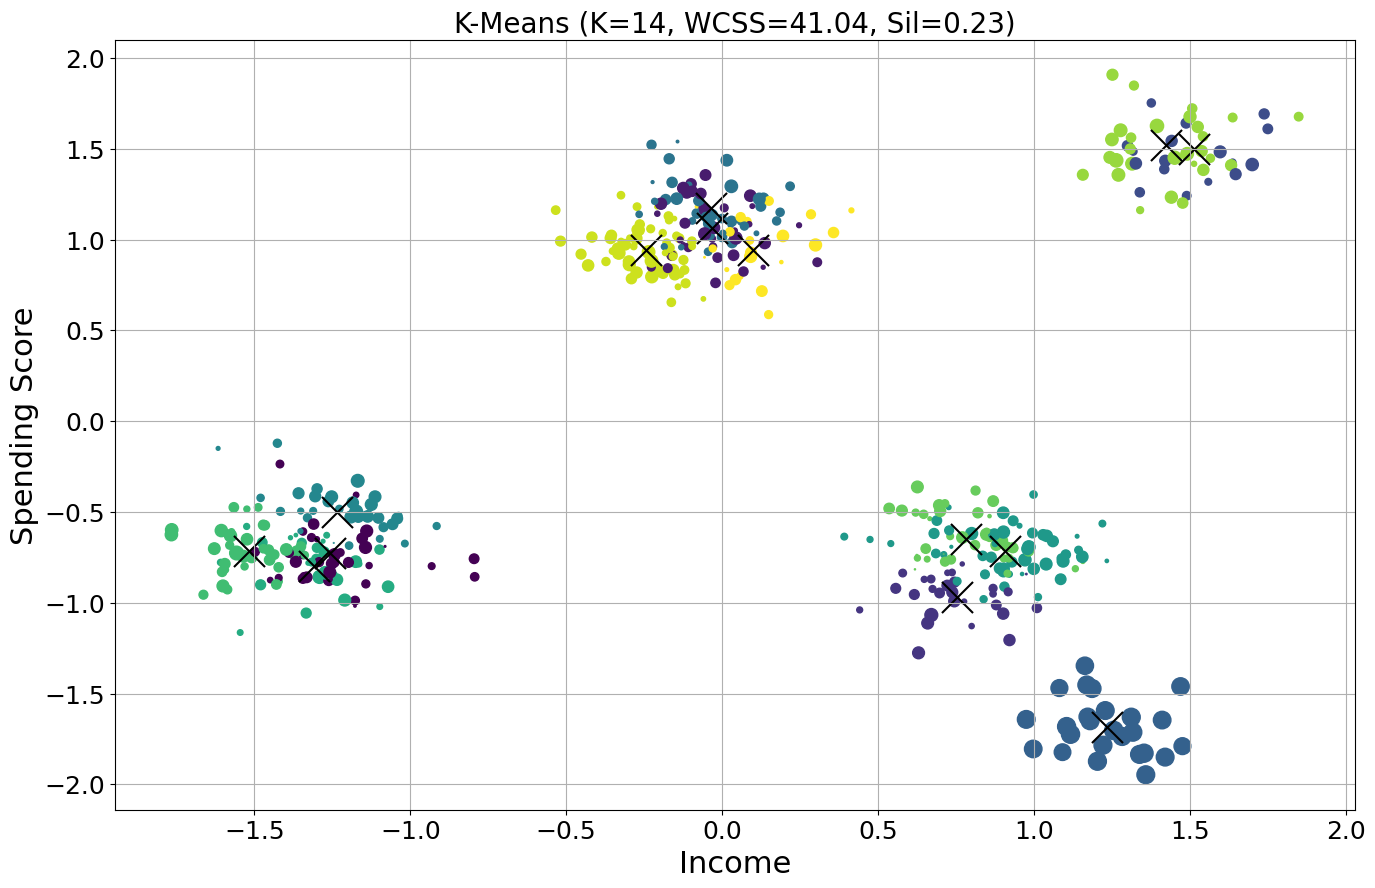

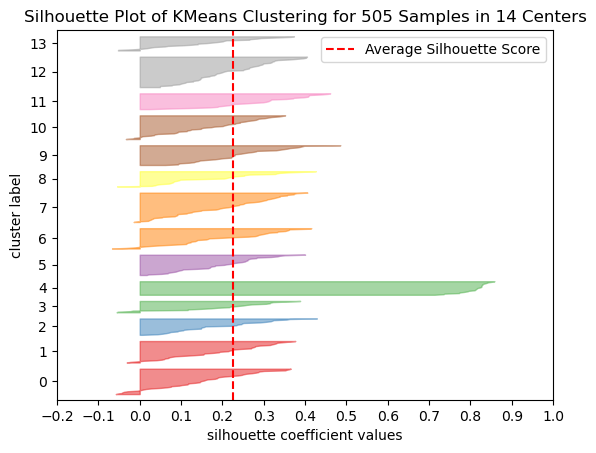

K=14, WCSS=41.04, Sil=0.23


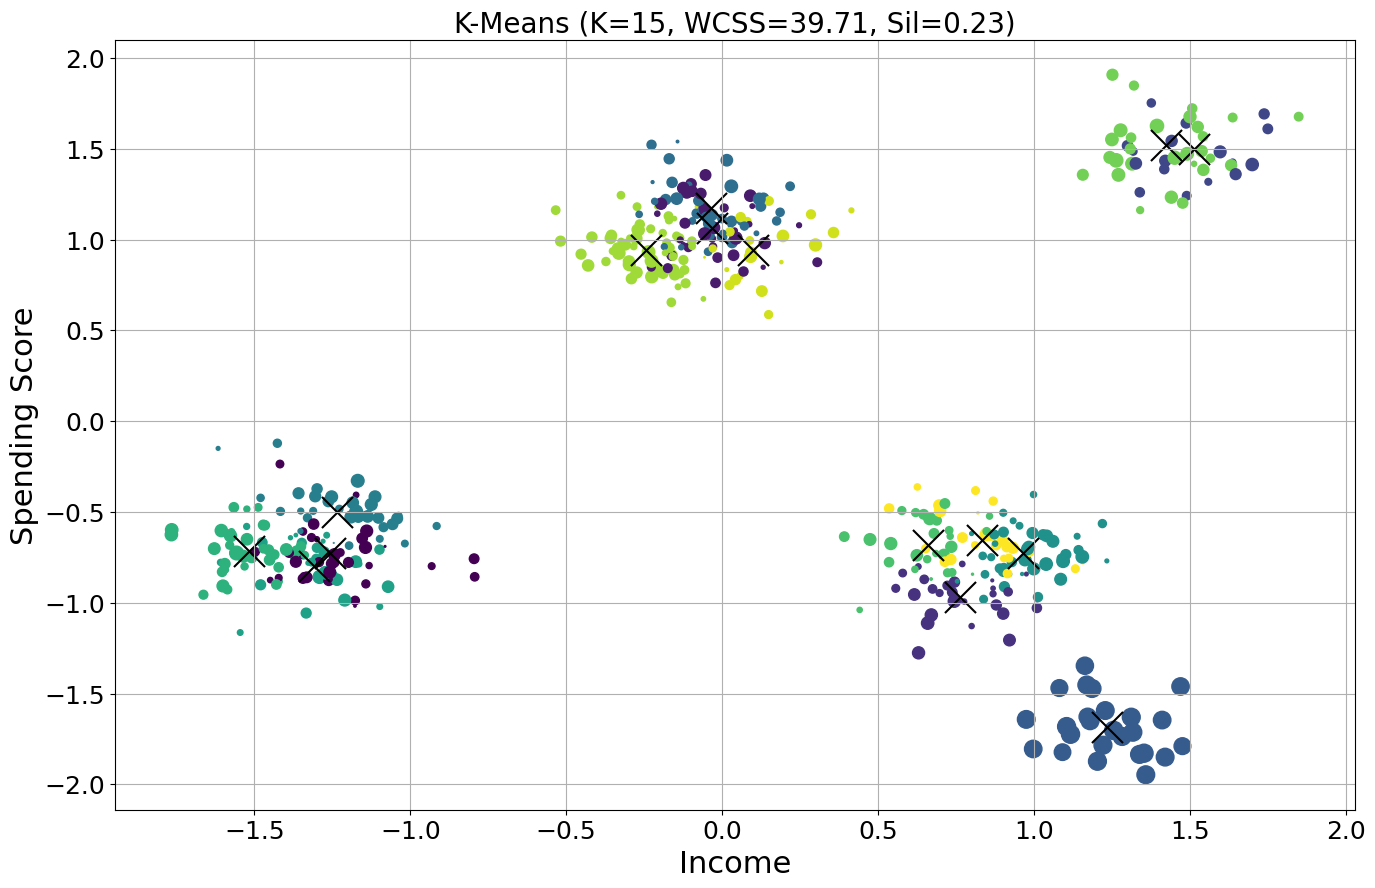

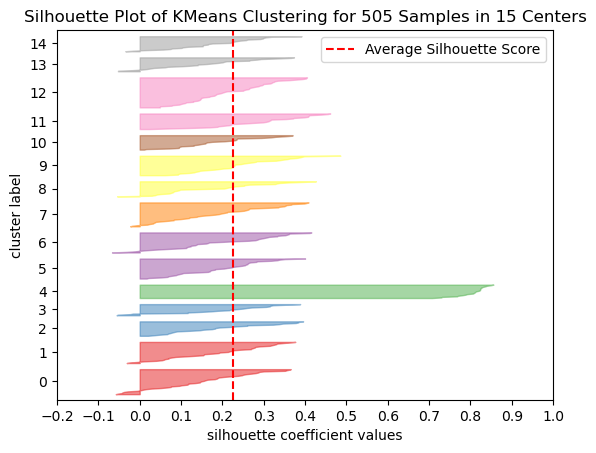

K=15, WCSS=39.71, Sil=0.23


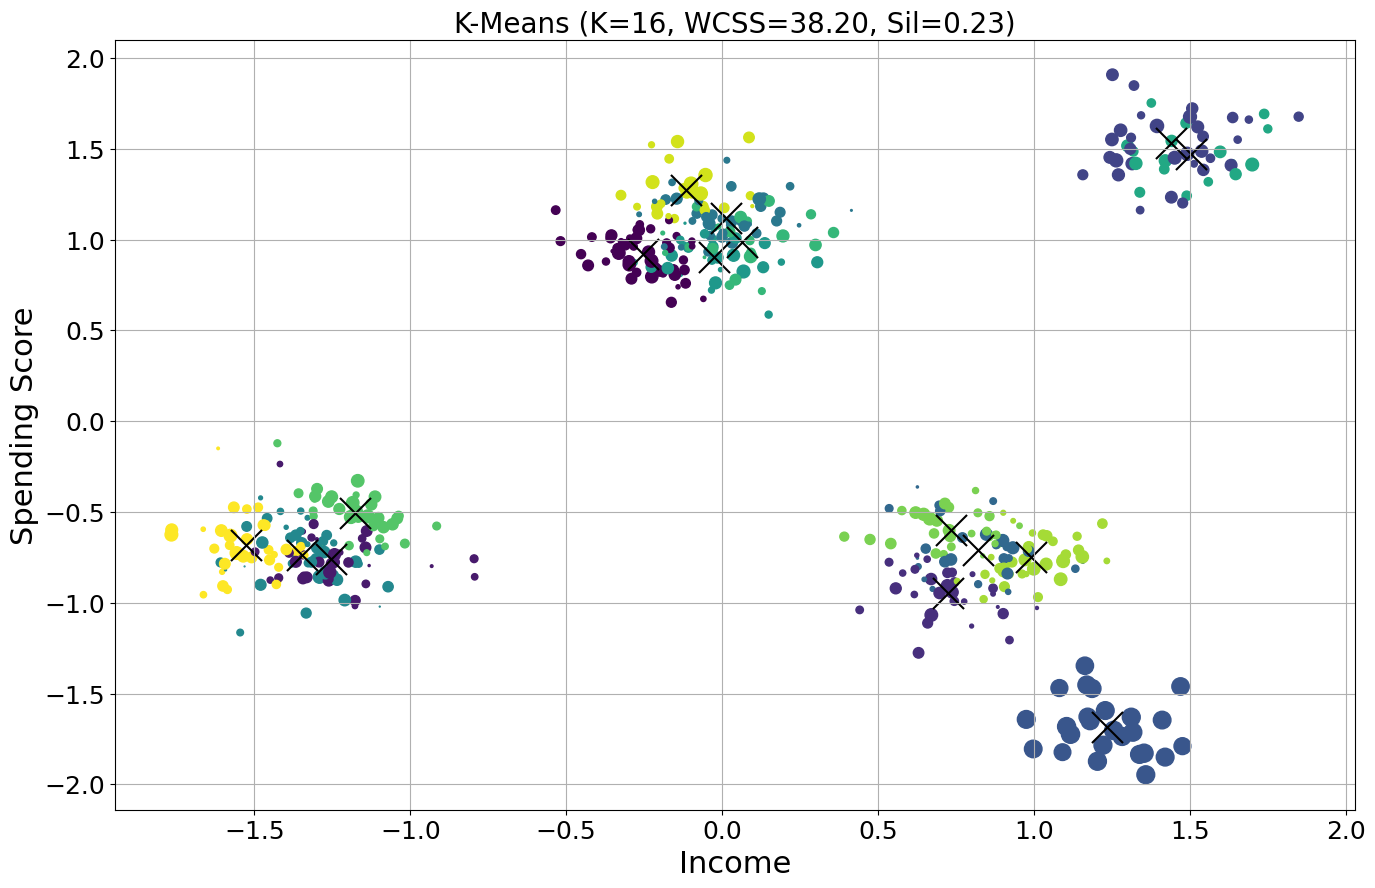

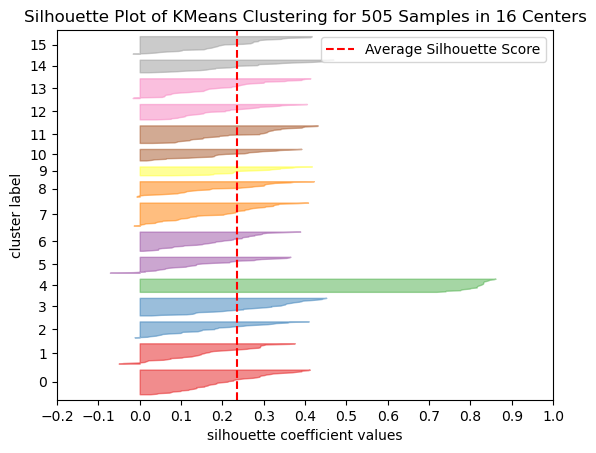

K=16, WCSS=38.20, Sil=0.23


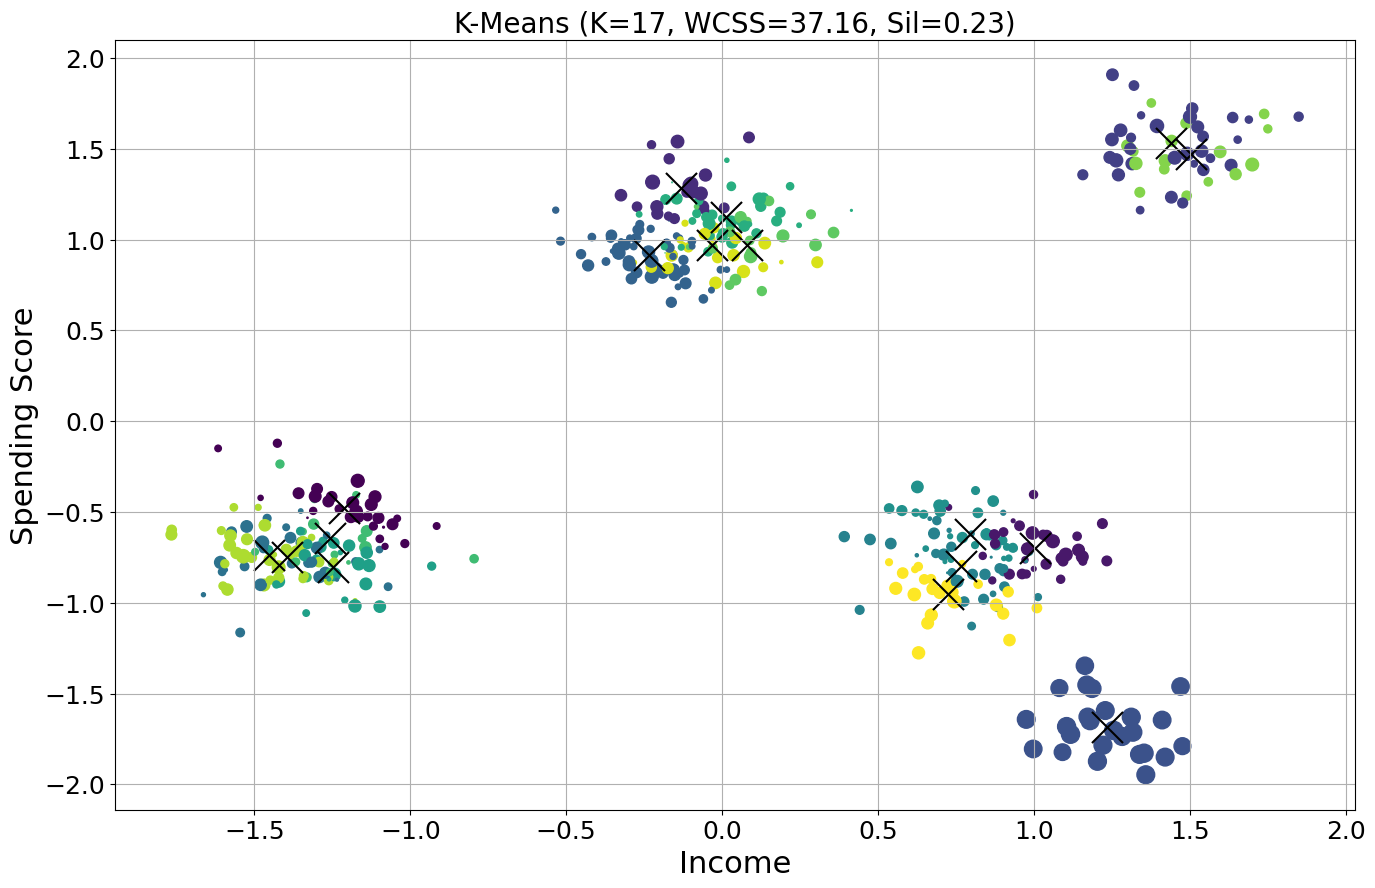

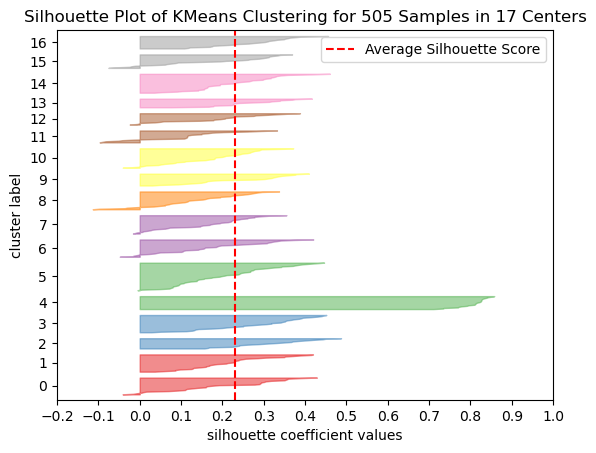

K=17, WCSS=37.16, Sil=0.23


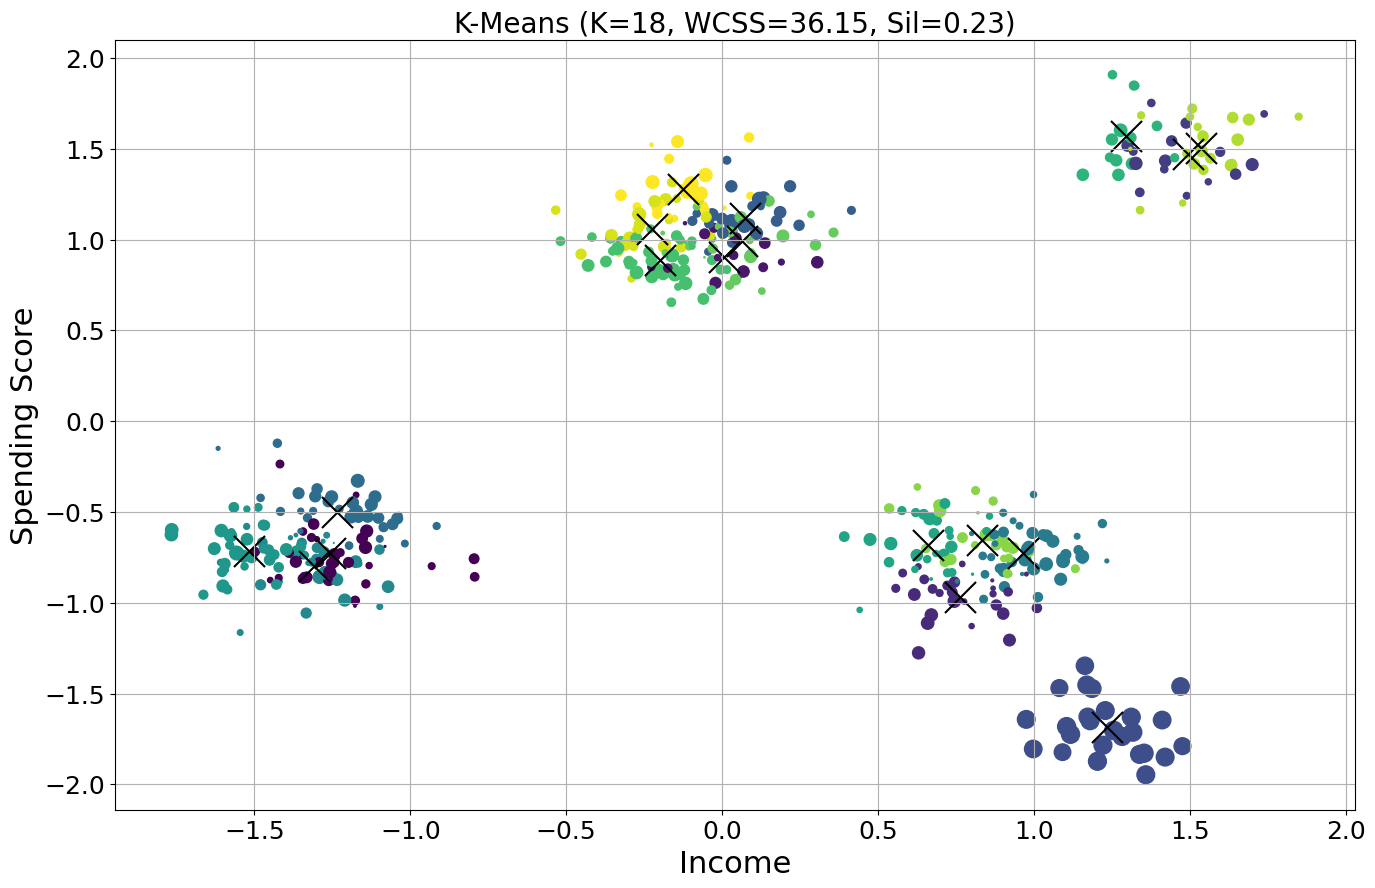

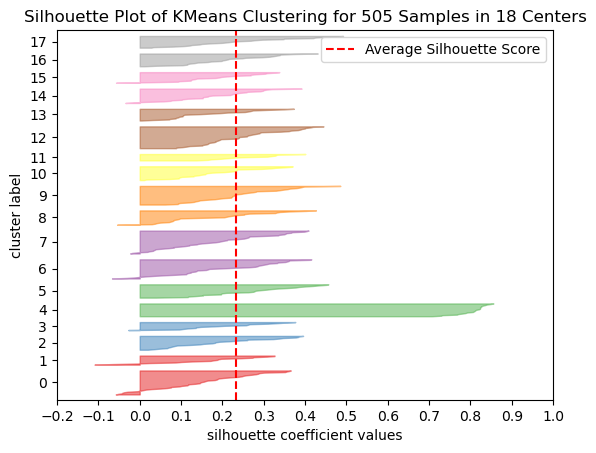

K=18, WCSS=36.15, Sil=0.23


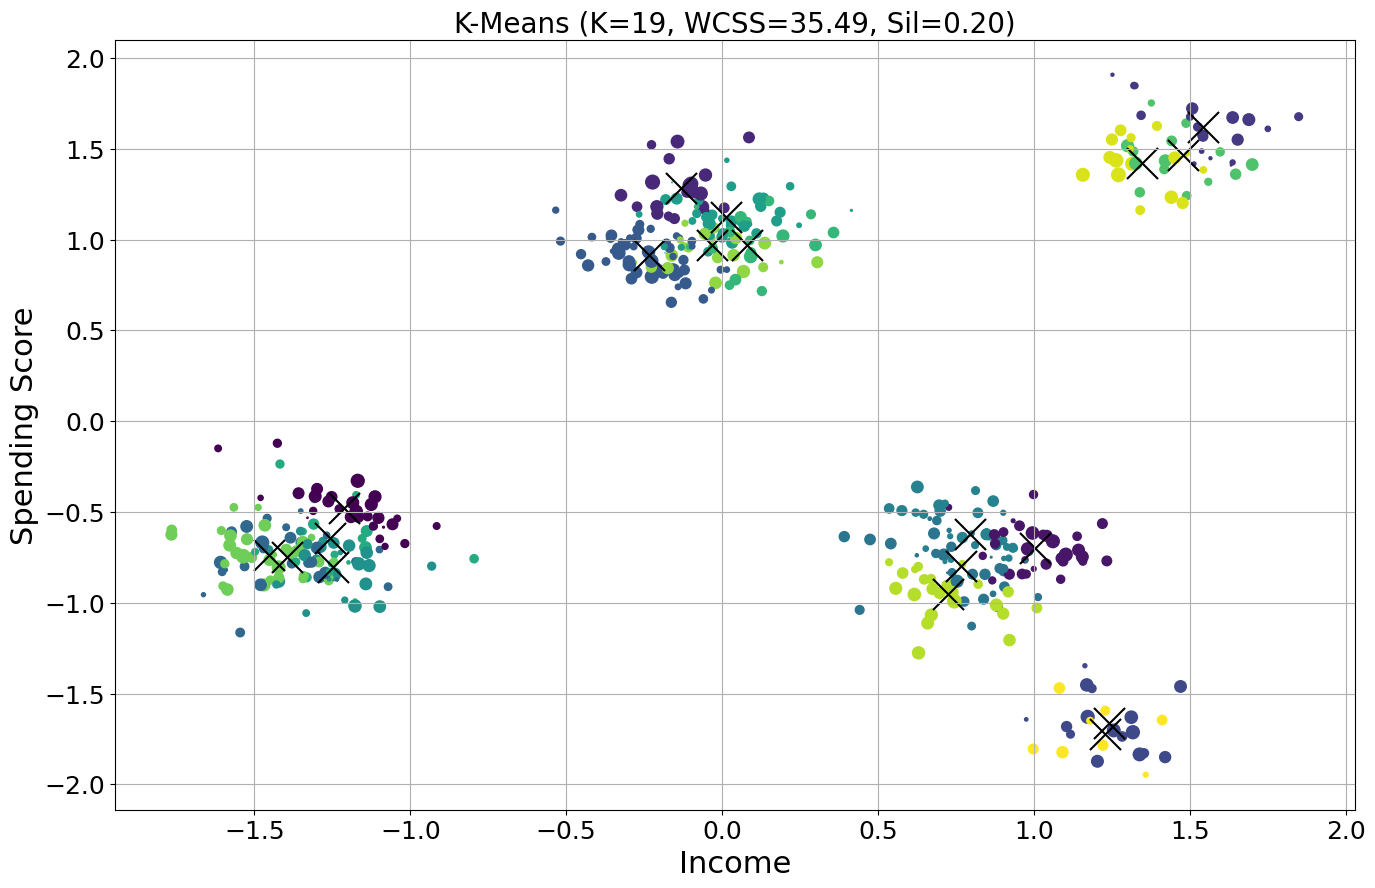

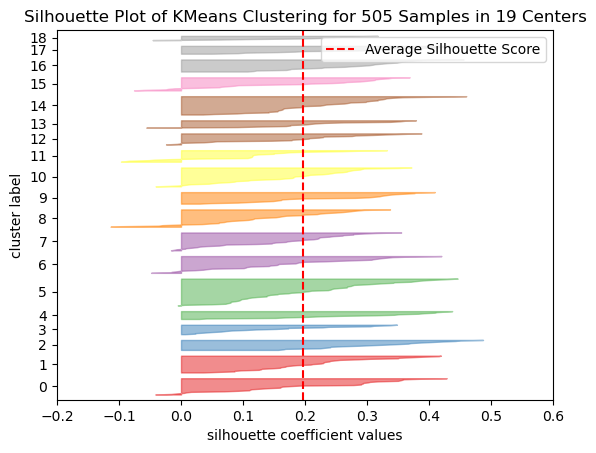

K=19, WCSS=35.49, Sil=0.20


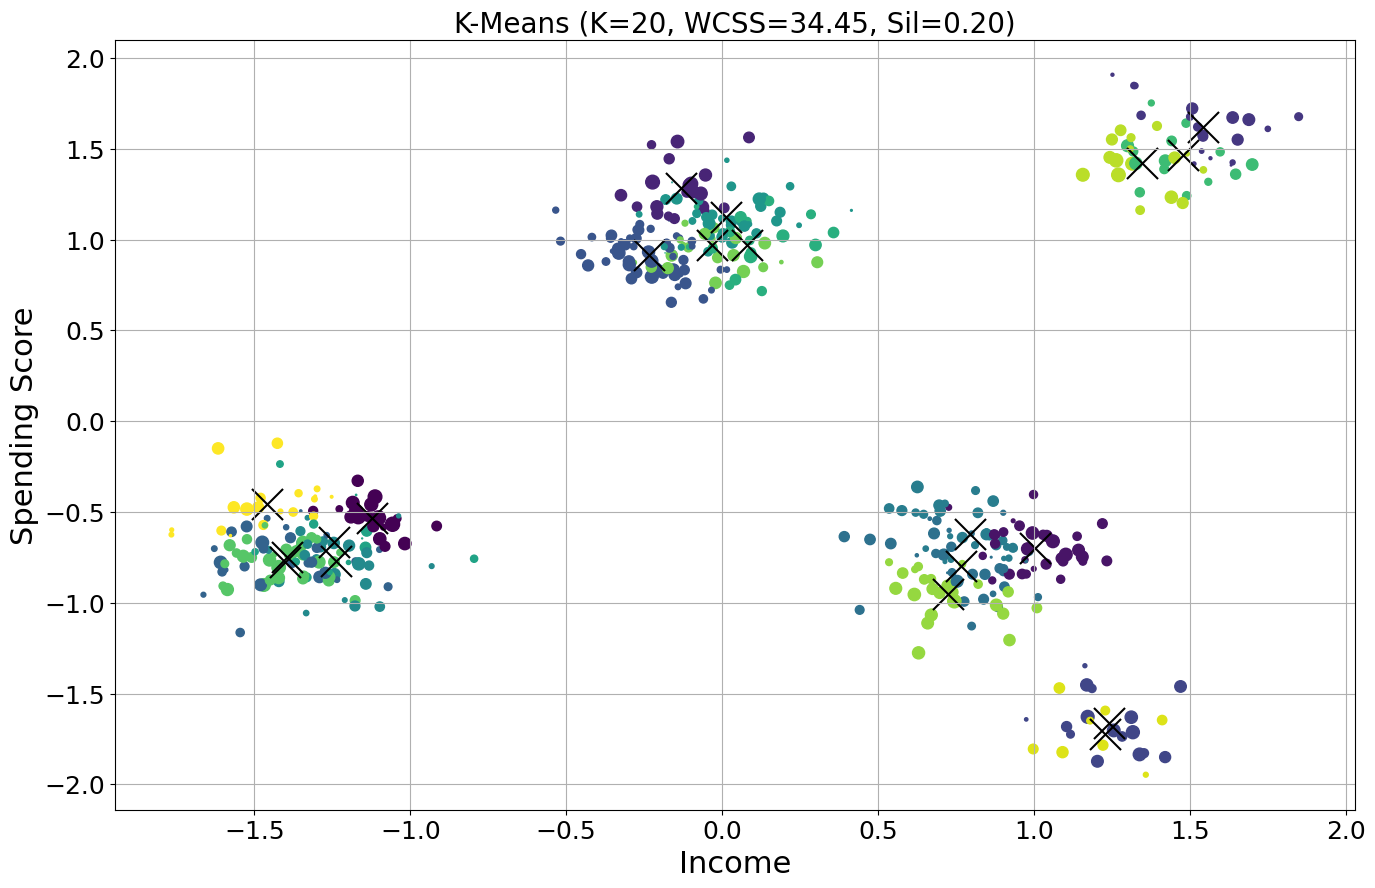

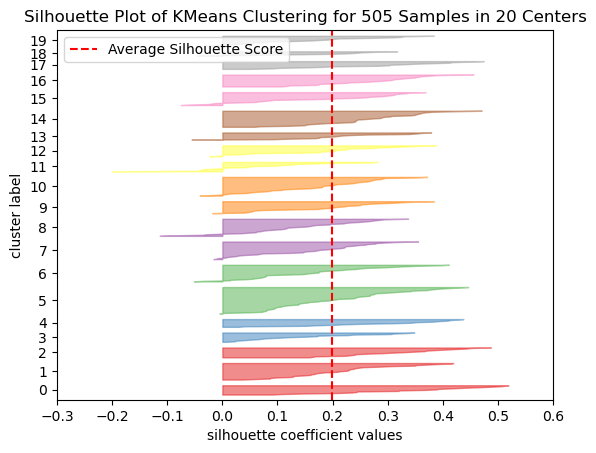

K=20, WCSS=34.45, Sil=0.20


In [15]:
def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    
    plt.style.use('default');

    sample_silhouette_values = silhouette_samples(X, k_means.labels_)
    sizes = 200*sample_silhouette_values

    plt.figure(figsize=(16, 10));
    plt.grid(True);

    plt.scatter(X.iloc[:, 1], X.iloc[:, 2], s=sizes, c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2], marker='x', s=500, c="black")

    plt.title("K-Means (K={}, WCSS={:.2f}, Sil={:.2f})".format(k, wcss, sil), fontsize=20);
    plt.xlabel('Income', fontsize=22);
    plt.ylabel('Spending Score', fontsize=22);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);
    plt.show()
    
    visualizer = SilhouetteVisualizer(k_means)
    visualizer.fit(X)
    visualizer.poof()
    fig = visualizer.ax.get_figure()
    
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 21):
    do_kmeans(X, k)

In [16]:
Y=X.copy()
Y=pd.DataFrame(scaler.inverse_transform(Y),columns=Y.columns)
Y["Cluster"]=k_means.labels_
Y.head()

Age   Income  SpendingScore       Savings  Cluster
0  58.0  77769.0       0.791329   6559.829923        2
1  59.0  81799.0       0.791082   5417.661426        2
2  62.0  74751.0       0.702657   9258.992965        2
3  59.0  74373.0       0.765680   7346.334504        2
4  87.0  17760.0       0.348778  16869.507130        0

In [17]:
Y.groupby("Cluster").mean()# calculating mean per cluster
#Cluster 3: targeted audience - Spenders
#Cluster 4: Will not spend money
#Cluster 2: Let's try to target:could be targeted as they tend to have high spending score
#Cluster 1:Starters with good income (good income, savings, not real spenders), not particularly interested in our products
#Cluster 0: Savers with lower income

Age         Income  SpendingScore       Savings
Cluster                                                       
0        87.775510   27866.102041       0.328800  16659.261445
1        32.777778  105265.809524       0.309926  14962.778066
2        59.955414   72448.063694       0.771518   6889.972190
3        24.180000  128029.120000       0.896892   4087.520309
4        86.000000  119944.040000       0.068378  14808.683792

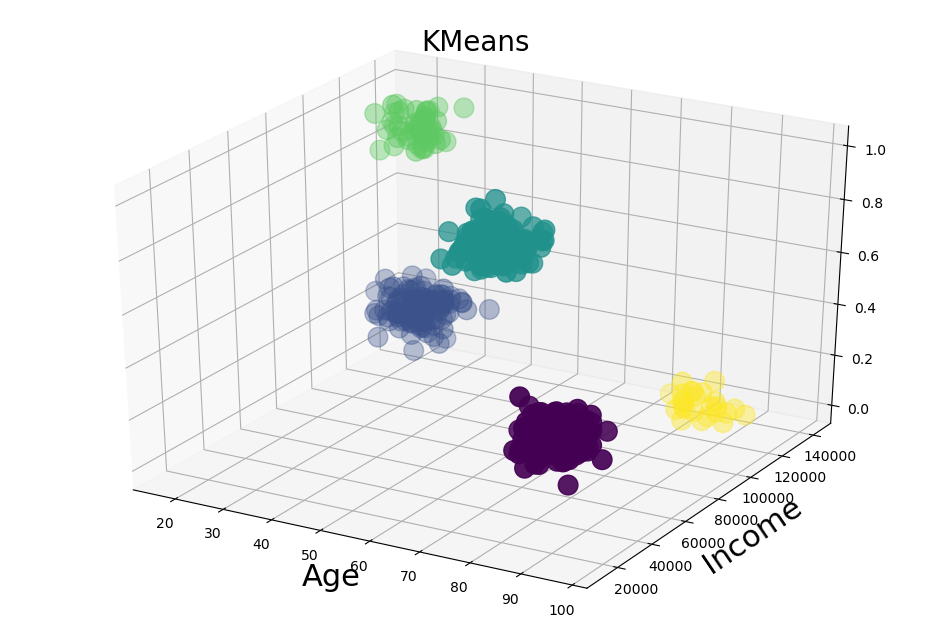

In [18]:
plt.style.use('default');
fig = plt.figure(figsize=(12, 8));
plt.grid(True);
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y['Age'], Y['Income'], Y['SpendingScore'], s=200, c=k_means.labels_);
plt.title("KMeans", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);

# DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3,min_samples=3)
dbscan.fit(X) #also produced 5 clusters as KMeans

DBSCAN(eps=0.3, min_samples=3)

In [20]:
dbscan.labels_

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1, -1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0, -1,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1, -1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4, -1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1, -1,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

In [21]:
silhouette_score(X, dbscan.labels_) #lower score than with KMeans

0.7679653694203252

# Looking for best eps values

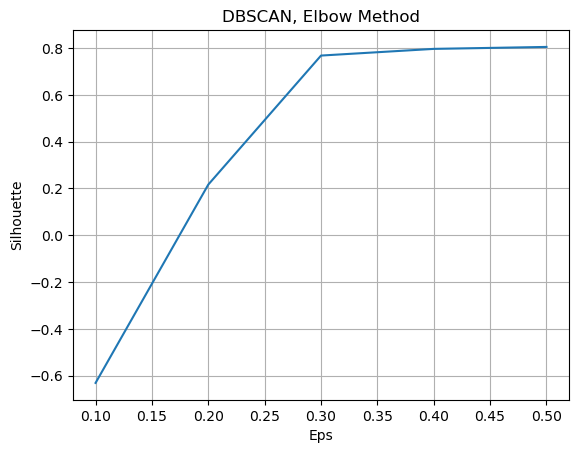

In [22]:
silhouettes = {}
for eps in np.arange(0.1, 0.6, 0.1):
    db = DBSCAN(eps=eps, min_samples=3).fit(X)
    silhouettes[eps] = silhouette_score(X, db.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.grid(True);

# Looking for best min_samples value
3 seems to be the best values

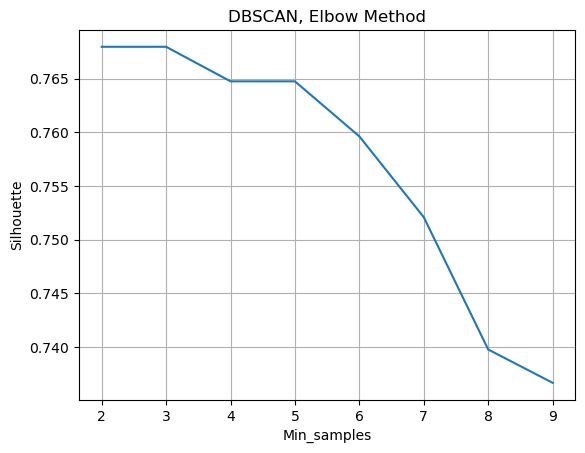

In [23]:
silhouettes = {}
for min_samples in np.arange(2,10):
    db = DBSCAN(eps=0.3, min_samples=min_samples).fit(X)
    silhouettes[min_samples] = silhouette_score(X, db.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Min_samples");
plt.ylabel("Silhouette");
plt.grid(True);

In [26]:
Y=X.copy()
Y=pd.DataFrame(scaler.inverse_transform(Y),columns=Y.columns)
Y["Cluster"]=dbscan.labels_
Y.head()

Age   Income  SpendingScore       Savings  Cluster
0  58.0  77769.0       0.791329   6559.829923        0
1  59.0  81799.0       0.791082   5417.661426        0
2  62.0  74751.0       0.702657   9258.992965        0
3  59.0  74373.0       0.765680   7346.334504        0
4  87.0  17760.0       0.348778  16869.507130        1

In [27]:
Y.groupby("Cluster").mean()# calculating mean per cluster
#Cluster 3: targeted audience - Spenders
#Cluster 4: Will not spend money
#Cluster 2: Let's try to target:could be targeted as they tend to have high spending score
#Cluster 1:Starters with good income (good income, savings, not real spenders), not particularly interested in our products
#Cluster 0: Savers with lower income

Age         Income  SpendingScore       Savings
Cluster                                                       
-1       58.846154   89070.846154       0.455540  11619.944256
 0       59.955414   72448.063694       0.771518   6889.972190
 1       87.769231   28043.734266       0.326902  16674.366590
 2       24.282609  127777.717391       0.899276   4217.289178
 3       85.863636  120442.318182       0.066442  14514.910530
 4       32.822581  105356.330645       0.310008  14999.980222

# Hierarchical

In [28]:
from scipy.cluster.hierarchy import linkage

h=linkage(X,method="ward",metric="euclidean")

In [29]:
h

array([[0.00000000e+00, 4.38000000e+02, 3.40898061e-02, 2.00000000e+00],
       [2.43000000e+02, 3.17000000e+02, 3.59683971e-02, 2.00000000e+00],
       [3.80000000e+01, 4.21000000e+02, 4.17707204e-02, 2.00000000e+00],
       ...,
       [9.99000000e+02, 1.00300000e+03, 1.97539565e+01, 2.07000000e+02],
       [1.00400000e+03, 1.00500000e+03, 3.61446493e+01, 2.98000000e+02],
       [1.00600000e+03, 1.00700000e+03, 4.43163847e+01, 5.05000000e+02]])

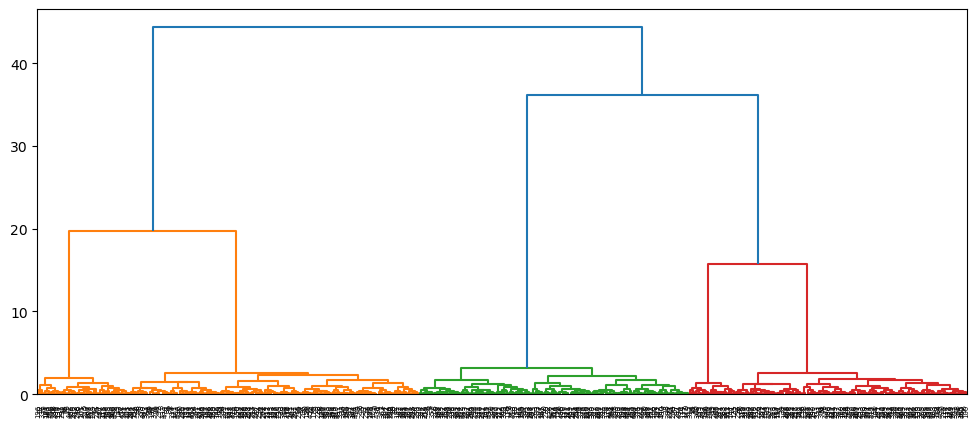

In [30]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,5));
dendrogram(h);

In [31]:
def plot_agg(X, linkage, metric):
    for n in range(2, 11):
        aggl = scipy.cluster.hierarchy.linkage(X, method=linkage, metric=metric)
        labels = scipy.cluster.hierarchy.fcluster(aggl, n, criterion="maxclust")
    
        sil = 0
        n = len(set(labels))
        if n > 1:
            sil = silhouette_score(X , labels, metric=metric)
        print("Linkage={}, Metric={}, Clusters={}, Silhouette={:.3}".format(linkage, metric, n, sil))

linkages = ['complete', 'ward', 'single', 'centroid', 'average']
metrics = ['euclidean', 'minkowski', 'cityblock', 'cosine', 'correlation', 'chebyshev', 'canberra', 'mahalanobis']

for prod in list(itertools.product(linkages, metrics)):
    
    # Some combos are not allowed
    if (prod[0] in ['ward', 'centroid']) and prod[1] != 'euclidean':
        continue
        
    plot_agg(X, prod[0], prod[1])

Linkage=complete, Metric=euclidean, Clusters=2, Silhouette=0.515
Linkage=complete, Metric=euclidean, Clusters=3, Silhouette=0.696
Linkage=complete, Metric=euclidean, Clusters=4, Silhouette=0.758
Linkage=complete, Metric=euclidean, Clusters=5, Silhouette=0.805
Linkage=complete, Metric=euclidean, Clusters=6, Silhouette=0.63
Linkage=complete, Metric=euclidean, Clusters=7, Silhouette=0.597
Linkage=complete, Metric=euclidean, Clusters=8, Silhouette=0.399
Linkage=complete, Metric=euclidean, Clusters=9, Silhouette=0.241
Linkage=complete, Metric=euclidean, Clusters=10, Silhouette=0.224
Linkage=complete, Metric=minkowski, Clusters=2, Silhouette=0.515
Linkage=complete, Metric=minkowski, Clusters=3, Silhouette=0.696
Linkage=complete, Metric=minkowski, Clusters=4, Silhouette=0.758
Linkage=complete, Metric=minkowski, Clusters=5, Silhouette=0.805
Linkage=complete, Metric=minkowski, Clusters=6, Silhouette=0.63
Linkage=complete, Metric=minkowski, Clusters=7, Silhouette=0.597
Linkage=complete, Metric=m

Linkage=single, Metric=chebyshev, Clusters=8, Silhouette=0.603
Linkage=single, Metric=chebyshev, Clusters=9, Silhouette=0.605
Linkage=single, Metric=chebyshev, Clusters=10, Silhouette=0.472
Linkage=single, Metric=canberra, Clusters=2, Silhouette=0.558
Linkage=single, Metric=canberra, Clusters=3, Silhouette=0.475
Linkage=single, Metric=canberra, Clusters=4, Silhouette=0.591
Linkage=single, Metric=canberra, Clusters=5, Silhouette=0.612
Linkage=single, Metric=canberra, Clusters=6, Silhouette=0.593
Linkage=single, Metric=canberra, Clusters=7, Silhouette=0.636
Linkage=single, Metric=canberra, Clusters=8, Silhouette=0.615
Linkage=single, Metric=canberra, Clusters=9, Silhouette=0.593
Linkage=single, Metric=canberra, Clusters=10, Silhouette=0.592
Linkage=single, Metric=mahalanobis, Clusters=2, Silhouette=0.513
Linkage=single, Metric=mahalanobis, Clusters=3, Silhouette=0.367
Linkage=single, Metric=mahalanobis, Clusters=4, Silhouette=0.477
Linkage=single, Metric=mahalanobis, Clusters=5, Silhouet

In [32]:
from scipy.cluster.hierarchy import fcluster

clusters=fcluster(h,5,criterion="maxclust")

In [33]:
h

array([[0.00000000e+00, 4.38000000e+02, 3.40898061e-02, 2.00000000e+00],
       [2.43000000e+02, 3.17000000e+02, 3.59683971e-02, 2.00000000e+00],
       [3.80000000e+01, 4.21000000e+02, 4.17707204e-02, 2.00000000e+00],
       ...,
       [9.99000000e+02, 1.00300000e+03, 1.97539565e+01, 2.07000000e+02],
       [1.00400000e+03, 1.00500000e+03, 3.61446493e+01, 2.98000000e+02],
       [1.00600000e+03, 1.00700000e+03, 4.43163847e+01, 5.05000000e+02]])

In [34]:
silhouette_score(X, clusters)

0.8048976287605383

In [36]:
Y=X.copy()
Y=pd.DataFrame(scaler.inverse_transform(Y),columns=Y.columns)
Y["Cluster"]=clusters
Y.head()

Age   Income  SpendingScore       Savings  Cluster
0  58.0  77769.0       0.791329   6559.829923        2
1  59.0  81799.0       0.791082   5417.661426        2
2  62.0  74751.0       0.702657   9258.992965        2
3  59.0  74373.0       0.765680   7346.334504        2
4  87.0  17760.0       0.348778  16869.507130        3

In [37]:
Y.groupby("Cluster").mean()

Age         Income  SpendingScore       Savings
Cluster                                                       
1        24.180000  128029.120000       0.896892   4087.520309
2        59.955414   72448.063694       0.771518   6889.972190
3        87.775510   27866.102041       0.328800  16659.261445
4        86.000000  119944.040000       0.068378  14808.683792
5        32.777778  105265.809524       0.309926  14962.778066

# Gaussian Mixture Models (GMM)

In [39]:
from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=5,n_init=10,covariance_type='full').fit(X)

labels = gm.predict(X)
silhouette_score(X, labels)

0.8048976287605383

In [40]:
labels

array([0, 0, 0, 0, 1, 3, 0, 1, 1, 1, 4, 2, 2, 2, 0, 4, 0, 1, 1, 4, 2, 4,
       0, 1, 4, 3, 3, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 3, 0,
       0, 3, 4, 3, 2, 0, 1, 2, 3, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 3, 3, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 3, 0, 4, 0, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 3, 1, 0, 3, 2, 0, 0, 2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 0, 2, 3, 1, 2, 1, 1, 1, 2, 4, 0, 1, 0, 0, 2, 0,
       2, 0, 3, 1, 4, 3, 0, 2, 1, 0, 0, 3, 0, 3, 0, 4, 0, 1, 0, 2, 1, 0,
       1, 4, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 2, 3, 3, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 3, 2,
       1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 3, 0, 1, 1, 1, 1, 0, 1, 2, 3, 2, 1,
       0, 0, 2, 1, 2, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 3, 0,
       0, 0, 4, 0, 2, 1, 3, 3, 3, 1, 0, 2, 1, 1, 2, 2, 0, 0, 4, 0, 0, 1,
       0, 1, 2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 4, 2, 1,
       1, 2, 4, 1, 1, 3, 0, 2, 2, 0, 2, 1, 1, 2, 0,

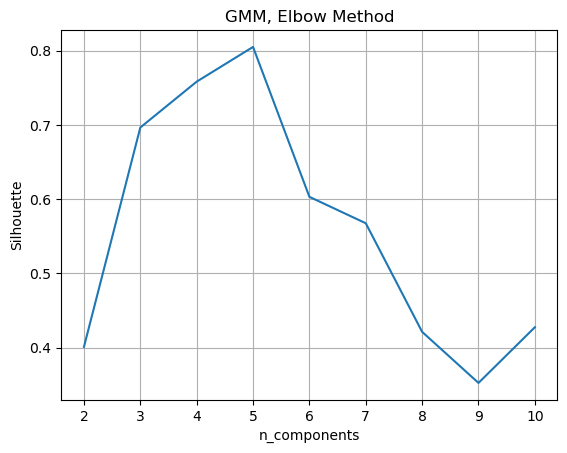

In [41]:
silhouettes = {}
for comp in np.arange(2, 11):
    gm = GaussianMixture(n_components=comp, n_init=10).fit(X)
    silhouettes[comp] = silhouette_score(X, gm.predict(X), metric='euclidean')
    

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('GMM, Elbow Method')
plt.xlabel("n_components");
plt.ylabel("Silhouette");
plt.grid(True);

In [42]:
Y=X.copy()
Y=pd.DataFrame(scaler.inverse_transform(Y),columns=Y.columns)
Y["Cluster"]=labels
Y.head()

Age   Income  SpendingScore       Savings  Cluster
0  58.0  77769.0       0.791329   6559.829923        0
1  59.0  81799.0       0.791082   5417.661426        0
2  62.0  74751.0       0.702657   9258.992965        0
3  59.0  74373.0       0.765680   7346.334504        0
4  87.0  17760.0       0.348778  16869.507130        1

In [43]:
Y.groupby("Cluster").mean()

Age         Income  SpendingScore       Savings
Cluster                                                       
0        59.955414   72448.063694       0.771518   6889.972190
1        87.775510   27866.102041       0.328800  16659.261445
2        32.777778  105265.809524       0.309926  14962.778066
3        24.180000  128029.120000       0.896892   4087.520309
4        86.000000  119944.040000       0.068378  14808.683792